# Introduction

<b> Context </b>
Rumour has it that in The Netherlands attitudes on seemingly unrelated topics are grouped within certain political parties.
They say - for example - that climate change-sceptiscim and Covid19-denial are often found in political parties that are also less open to immigrants or are more conservative. I'm curious to find out if there is a truth in this rumour. Analyzing the European Social Survey of 2016 might give a glimpse of the answer.  

<b> Objective </b>
In this notebook, I will use different models to try to predict whether someone thinks to what degree climate change is real. The focus is on learning to use and evaluate different machine learning techniques. 

<b>The data</b>
The data belongs to the European Social Survey (2016). The European Social Survey is an multi-country survey that aims to unravel public opinions on different topics. All editions have recurring questions concerning public attitudes and values towards eg media, social trust and politics. On top of that, each edition has an extra topic. In 2016 they researched public attitudes to climate change, energy security, and energy preferences and welfare attitudes. See the data folder for more information about the Survey and the data. 

<b> Approach </b>
I will use the csv in which the NaNs are filled and no rows or columns are lost. First I will compare the performance of the four different models on the entire dataset, leaving in climate- and energy- related questions.
Next I will see how well the model performs when it does <i>not</i> have these climate and energy- related questions at it's disposal.

## Importing packages and basic inspection of the data

In [1]:
#Import packages

#basics
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

#preparation:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from imblearn import under_sampling #import RandomUnderSampler

#models:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

#metrics:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import plot_importance


In [2]:
plt.style.use("fast")

In [3]:
# load data and metadata 
data = pd.read_csv('./data/climate_full_fill.csv')
metadata =pd.read_csv('./data/metadata.csv')

In [4]:
#make sure you can read and see the data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Unnamed: 0,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnbat,rlgdnbe,rlgdnach,rlgdnade,rlgdnafi,rlgdngb,rlgdnhu,rlgdnie,rlgdnis,rlgdnlt,rlgdnnl,rlgdnno,rlgdnapl,rlgdnase,rlgblge,rlgdnme,rlgdebat,rlgdebe,rlgdeach,rlgdeade,rlgdeafi,rlgdegb,rlgdehu,rlgdeie,rlgdeis,rlgdelt,rlgdenl,rlgdeno,rlgdeapl,rlgdease,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edlveat,edlvebe,edlvdch,edlvdcz,edubde1,eduade2,eduade3,edlvdee,edlvges,edlvdfi,edlvdfr,edubgb1,eduagb2,edagegb,edlvdhu,edlvdie,edubil1,eduail2,edlvdis,edlvdit,edlvdlt,edlvenl,edlvdno,edlvepl,edupl2,edlvdpt,edlvdru,edlvdse,edlvesi,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,edlvpeat,edlvpebe,edlvpdch,edlvpdcz,edupbde1,edupade2,edupade3,edlvpdee,edlvpfes,edlvpdfi,edlvpdfr,edupbgb1,edupagb2,edagepgb,edlvpdhu,edlvpdie,edupbil1,edupail2,edlvpdis,edlvpdit,edlvpdlt,edlvpenl,edlvpdno,edlvpepl,eduppl2,edlvpdpt,edlvpdru,edlvpdse,edlvpesi,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfeat,edlvfebe,edlvfdch,edlvfdcz,edufbde1,edufade2,edufade3,edlvfdee,edlvffes,edlvfdfi,edlvfdfr,edufbgb1,edufagb2,edagefgb,edlvfdhu,edlvfdie,edufbil1,edufail2,edlvfdis,edlvfdit,edlvfdlt,edlvfenl,edlvfdno,edlvfepl,edlvfdpt,edlvfdru,edlvfdse,edlvfesi,emprf14,occf14b,edulvlmb,eiscedm,edlvmeat,edlvmebe,edlvmdch,edlvmdcz,edumbde1,edumade2,edumade3,edlvmdee,edlvmfes,edlvmdfi,edlvmdfr,edumbgb1,edumagb2,edagemgb,edlvmdhu,edlvmdie,edumbil1,edumail2,edlvmdis,edlvmdit,edlvmdlt,edlvmenl,edlvmdno,edlvmepl,edlvmdpt,edlvmdru,edlvmdse,edlvmesi,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ips

I will drop columns that the model is not allowed to use as predictors:
- unnamed columns index 0
- the weights columns, index -1 till -4
- the length and date of interview (everything after 'intewde' column)

In [6]:
# data = data.drop("Unnamed: 0", axis=1)
i = [*range(-15, 0), 0]
data = data.drop(data.columns[i], axis=1)

In [7]:
data.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnbat,rlgdnbe,rlgdnach,rlgdnade,rlgdnafi,rlgdngb,rlgdnhu,rlgdnie,rlgdnis,rlgdnlt,rlgdnnl,rlgdnno,rlgdnapl,rlgdnase,rlgblge,rlgdnme,rlgdebat,rlgdebe,rlgdeach,rlgdeade,rlgdeafi,rlgdegb,rlgdehu,rlgdeie,rlgdeis,rlgdelt,rlgdenl,rlgdeno,rlgdeapl,rlgdease,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edlveat,edlvebe,edlvdch,edlvdcz,edubde1,eduade2,eduade3,edlvdee,edlvges,edlvdfi,edlvdfr,edubgb1,eduagb2,edagegb,edlvdhu,edlvdie,edubil1,eduail2,edlvdis,edlvdit,edlvdlt,edlvenl,edlvdno,edlvepl,edupl2,edlvdpt,edlvdru,edlvdse,edlvesi,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,edlvpeat,edlvpebe,edlvpdch,edlvpdcz,edupbde1,edupade2,edupade3,edlvpdee,edlvpfes,edlvpdfi,edlvpdfr,edupbgb1,edupagb2,edagepgb,edlvpdhu,edlvpdie,edupbil1,edupail2,edlvpdis,edlvpdit,edlvpdlt,edlvpenl,edlvpdno,edlvpepl,eduppl2,edlvpdpt,edlvpdru,edlvpdse,edlvpesi,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfeat,edlvfebe,edlvfdch,edlvfdcz,edufbde1,edufade2,edufade3,edlvfdee,edlvffes,edlvfdfi,edlvfdfr,edufbgb1,edufagb2,edagefgb,edlvfdhu,edlvfdie,edufbil1,edufail2,edlvfdis,edlvfdit,edlvfdlt,edlvfenl,edlvfdno,edlvfepl,edlvfdpt,edlvfdru,edlvfdse,edlvfesi,emprf14,occf14b,edulvlmb,eiscedm,edlvmeat,edlvmebe,edlvmdch,edlvmdcz,edumbde1,edumade2,edumade3,edlvmdee,edlvmfes,edlvmdfi,edlvmdfr,edumbgb1,edumagb2,edagemgb,edlvmdhu,edlvmdie,edumbil1,edumail2,edlvmdis,edlvmdit,edlvmdlt,edlvmenl,edlvmdno,edlvmepl,edlvmdpt,edlvmdru,edlvmdse,edlvmesi,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsaf

In [8]:
# first inspect the columns that are numerical, select those columns

nums = data.select_dtypes(include="float64")

cols = ["shorthand", "nans_", "max_", "median_", "mean_"]
df = pd.DataFrame(columns=cols, index=range(len(nums.columns)))

for i in range(len(nums.columns)):
    df.loc[i].shorthand = nums.iloc[:,i].name
    df.loc[i].max_ = nums.iloc[:,i].max()
    df.loc[i].median_ = nums.iloc[:,i].median()
    df.loc[i].mean_ = nums.iloc[:,i].mean()
    df.loc[i].nans_ = nums.iloc[:,i].isnull().sum()

In [9]:
df.head()

,shorthand,nans_,max_,median_,mean_
0,nwspol,0,1428,60,84.4219
1,netusoft,0,5,5,3.85367
2,netustm,0,1440,70,134.116
3,ppltrst,0,10,5,5.2556
4,pplfair,0,10,6,5.7654


In [10]:
metadata.head(12)

,shorthand,nom_or_scale,full_text
0,name,nominal,Title of dataset
1,essround,nominal,ESS round
2,edition,nominal,Edition
3,proddate,nominal,Production date
4,idno,nominal,Respondent's identification number
5,cntry,nominal,Country
6,nwspol,scale,"News about politics and current affairs, watching, reading or listening, in minutes"
7,netusoft,nominal,"Internet use, how often"
8,netustm,scale,"Internet use, how much time on typical day, in minutes"
9,ppltrst,nominal,Most people can be trusted or you can't be too careful


In [11]:
#merge with the metadata, so you know what you're looking at, so you can decide on an approach
nums2 = pd.merge(df, metadata, on="shorthand", how="left")

In [12]:
nums2.sort_values(by=["nom_or_scale","max_"], ascending=False)

,shorthand,nans_,max_,median_,mean_,nom_or_scale,full_text
348,njbspv,0,18000,0.12345,6.66022,scale,Number of people responsible for in job
344,emplno,0,7777,0.12345,0.81878,scale,Number of employees respondent has/had
159,livecnta,0,2017,0.12345,199.615,scale,What year you first came to live in country
255,yrbrn2,0,2017,1959,1514.75,scale,Year of birth of second person in household
256,yrbrn3,0,2017,0.12345,852.251,scale,Year of birth of third person in household
257,yrbrn4,0,2017,0.12345,498.252,scale,Year of birth of fourth person in household
258,yrbrn5,0,2017,0.12345,178.609,scale,Year of birth of fifth person in household
259,yrbrn6,0,2017,0.12345,59.8066,scale,Year of birth of sixth person in household
260,yrbrn7,0,2017,0.12345,20.2267,scale,Year of birth of seventh person in household
264,yrbrn11,0,2017,0.12345,0.530932,scale,Year of birth of eleventh person in household


# Step 1: Cleaning and storing in new CSV

Most colums range from 0 to 5 or 10 or 13. But not all. There are several problematic columns and values. For example  columns that contain:
<ol>
    <li> strings </li>
    <li> a wide range of values </li>
    <li> encoding of "no answer" etc (eg 6666, 9999) that can lie pretty far out of the 'usual' range </li>
</ol>
    
To be able to use the string-columns these values need to be converted to numbers.  
To prevent that the importance of the high values is overestimated, I will try to force them into a 0-10 range.


<b>1: String columns </b>
<ul>
    <li> Approach: encode using [labelencoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for as far as they are NOT ordinal (not: bad, oke, perfect). For categorical strings (if any are present), use [OneHotEncoder or OrdinalEncoder](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936#61217936)</li>
    <li> ALL DATA (test and train) before splitting</li>
</ul>

<b>2: Wide range of values</b><br>
<ul>
    <li>YEARS</li>
    <ul> 
        <li>Approach: use MinMaxScaler (normalization) to bring in range of 0-10</li>
        <li>Alternative approach: substract minimum year in the column from the other years in the column.</li>
        <li>ALL DATA (test and train) before splitting</li>
    </ul>
    <li> ISCO08 and ISCO08p </li>
    <ul>
        <li>This is in fact a label already, but with the unfortunate range from: 0,10,100,110,200,210,300,310, 1000-9629</li>
        <li>Approach: Label-encoder to tighten the range</li>
        <li>Note: do not apply MinMaxScaler on top of this.</li>
        <li>ALL DATA (test and train) before splitting</li>
    </ul>
    <li> ANCESTRY (anctry1 / 2)</li>
    <ul>
        <li> The ecoding is always 5 digits long, and even 6 when the response is a "no answer"-kind</li>
        <li> Approach: use LabelEncoder to tighten the range</li>
        <li> Note: do not apply MinMaxScaler on top of this</li>
        <li> ALL DATA (test and train).</li>
    </ul>
    <li> EDUCATION and RELIGION</li>
    <ul>
        <li> Each country has their own education and religion columns. On top of that there are "converted" columns, where the education/religion of different countries are encoded in the same manner in one column. </li>
        <li> Approach: use the columns that are already "converted" by the researchers and delete the country-specific ones.</li>
    </ul>
    <li>MINUTES</li>
    <ul>
        <li> eg time spent online in minutes</li>
        <li> Approach 1: use MinMaxScalar (bring into range of 0-1)</li>
        <li> Alternative approach (not applied here): take natural log and standardize</li>
        <li> TRAIN DATA for MinMaxScalar</li>
    </ul>
    </ul>
    
<b>3: No answer</b>
<ul>
    <li>Could potentially affect all columns in the dataframe, categorical and continuous alike </li>
    <li>Is in fact a category (see encoding below)
    <li>Approach: check for these double (or more) digits and replace them by 0.{specific digit}. Note, do this after the encoding of the ISCO08(b) columns.</li>
    <li>ALL DATA (test and train), before splitting</li>
</ul>

<b>Examples of "No Answer"-like responses:</b><br>
55/5555: other<br>
66/6666: not applicable<br>
7/77/7777: refusal<br>
8/88/8888: Don’t know<br>
9/99/9999: No answer<br>


## Education and religion simplifier
Education and religion have seperate columns for each country and an aggregated column, where the education/religion of different countries are merged. For education this happens four times: once for the participant, once for the partner of the participant and twice for the parents. 
For Religion there is present and past for each country.
It's a bit much and the columns are messy: In Finland is roman catholic a 3, in UK a 1, in hungary 110 etc.
I will therefore only keep the 5 aggregated columns.

In [13]:
test_data = data.head(20)
test_data.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnbat,rlgdnbe,rlgdnach,rlgdnade,rlgdnafi,rlgdngb,rlgdnhu,rlgdnie,rlgdnis,rlgdnlt,rlgdnnl,rlgdnno,rlgdnapl,rlgdnase,rlgblge,rlgdnme,rlgdebat,rlgdebe,rlgdeach,rlgdeade,rlgdeafi,rlgdegb,rlgdehu,rlgdeie,rlgdeis,rlgdelt,rlgdenl,rlgdeno,rlgdeapl,rlgdease,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edlveat,edlvebe,edlvdch,edlvdcz,edubde1,eduade2,eduade3,edlvdee,edlvges,edlvdfi,edlvdfr,edubgb1,eduagb2,edagegb,edlvdhu,edlvdie,edubil1,eduail2,edlvdis,edlvdit,edlvdlt,edlvenl,edlvdno,edlvepl,edupl2,edlvdpt,edlvdru,edlvdse,edlvesi,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,edlvpeat,edlvpebe,edlvpdch,edlvpdcz,edupbde1,edupade2,edupade3,edlvpdee,edlvpfes,edlvpdfi,edlvpdfr,edupbgb1,edupagb2,edagepgb,edlvpdhu,edlvpdie,edupbil1,edupail2,edlvpdis,edlvpdit,edlvpdlt,edlvpenl,edlvpdno,edlvpepl,eduppl2,edlvpdpt,edlvpdru,edlvpdse,edlvpesi,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfeat,edlvfebe,edlvfdch,edlvfdcz,edufbde1,edufade2,edufade3,edlvfdee,edlvffes,edlvfdfi,edlvfdfr,edufbgb1,edufagb2,edagefgb,edlvfdhu,edlvfdie,edufbil1,edufail2,edlvfdis,edlvfdit,edlvfdlt,edlvfenl,edlvfdno,edlvfepl,edlvfdpt,edlvfdru,edlvfdse,edlvfesi,emprf14,occf14b,edulvlmb,eiscedm,edlvmeat,edlvmebe,edlvmdch,edlvmdcz,edumbde1,edumade2,edumade3,edlvmdee,edlvmfes,edlvmdfi,edlvmdfr,edumbgb1,edumagb2,edagemgb,edlvmdhu,edlvmdie,edumbil1,edumail2,edlvmdis,edlvmdit,edlvmdlt,edlvmenl,edlvmdno,edlvmepl,edlvmdpt,edlvmdru,edlvmdse,edlvmesi,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsaf

In [14]:
len(data.columns)

515

In [15]:
#select unwanted columns using the descriptions in de metadata
rows_edu = metadata[(metadata["full_text"].str.contains("education,", regex=False)) & (~metadata["full_text"].str.contains("ES - ISCED", regex=False))]
rows_rel = metadata[(metadata["full_text"].str.contains("belonging to at present,", regex=False)) | (metadata["full_text"].str.contains("belonging to in the past,", regex=False))]

#select the column-names (shorthands)
col_names = list(rows_edu["shorthand"])
col_names.extend(rows_rel["shorthand"].tolist())

In [16]:
#cut the columns out of the dataframe
data = data.drop(col_names, axis=1)

In [17]:
len(data.columns) #check

375

In [18]:
data.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,AT,120.0,4.0,180.00000,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.00000,1.00000,1.00000,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.00000,0.12345,2.00000,0.12345,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,DE,2.0,DE,2010.00000,GER,ZZ,2.0,2.0,DE,2.0,DE,1.0,5.0,1.0,8.0,4.0,10.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,0.12345,4.0,4.0,8.0,4.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,0.12345,0.12345,0.12

In [19]:
len(rows_rel)+len(rows_edu)+len(data.columns) #check

515

## Handle the string-columns

In [20]:
obj = data.select_dtypes(include="object")

In [21]:
obj.head()

,cntry,ctzshipc,cntbrthc,lnghom1,lnghom2,fbrncntb,mbrncntb,region
0,AT,DE,DE,GER,ZZ,DE,DE,AT13
1,AT,DE,DE,GER,ZZ,DE,DE,AT13
2,AT,ZZ,ZZ,GER,ZZ,ZZ,ZZ,AT31
3,AT,ZZ,ZZ,GER,ZZ,ZZ,ZZ,AT13
4,AT,TR,TR,TUR,GER,TR,TR,AT22


In [22]:
obj_cols = list(obj.columns)
print(obj_cols)

['cntry', 'ctzshipc', 'cntbrthc', 'lnghom1', 'lnghom2', 'fbrncntb', 'mbrncntb', 'region']


In [23]:
# I tried LabelEncoder, but it says there are both floats and strings in the columns. Check out in which column(s) the float(s) are:
for i in obj_cols:
    list_of_items = data[i].unique()
    types_ = [type(item) for item in list_of_items] #make list of item types
    for j in types_:
        if j != str:
            print(j, i) #there's at least one float in the fbrncntb column

<class 'float'> fbrncntb


In [24]:
#check at what index/indices the float is:
for i in range(len(data)):
    if type(data["fbrncntb"][i]) == float:
        print("index:", i)
        print("check:", type(data["fbrncntb"][i]))

index: 10133
check: <class 'float'>


In [25]:
# convert the float to string: "ZZ"
data.loc[10133, "fbrncntb"] = "ZZ"

print(data["fbrncntb"][10133]) #check
print(type(data["fbrncntb"][10133])) #double check

ZZ
<class 'str'>


In [26]:
data[obj_cols] = data[obj_cols].apply(LabelEncoder().fit_transform) 

print(data[obj_cols].max()) #see how many unique values there are. 

data[obj_cols].head()


cntry        22
ctzshipc    121
cntbrthc    158
lnghom1     124
lnghom2     142
fbrncntb    161
mbrncntb    159
region      274
dtype: int32


,cntry,ctzshipc,cntbrthc,lnghom1,lnghom2,fbrncntb,mbrncntb,region
0,0,32,40,42,142,40,41,2
1,0,32,40,42,142,40,41,2
2,0,121,158,42,142,161,159,5
3,0,121,158,42,142,161,159,2
4,0,112,142,111,52,146,144,4


In [27]:
data.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,0,120.0,4.0,180.00000,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.00000,1.00000,1.00000,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.00000,0.12345,2.00000,0.12345,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,32,2.0,40,2010.00000,42,142,2.0,2.0,40,2.0,41,1.0,5.0,1.0,8.0,4.0,10.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,0.12345,4.0,4.0,8.0,4.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,0.12345,0.12345,0.123

## Handle years and minutes

For years, the alternative approach is to substract the minimum value in the column from each element in the column. As the nans are filled with 0.12345, when looking for the minimum value, this value should be excluded. 
I will store those 'alternative years' in a seperate dataframe.

In [28]:
# calculate the minimum value of a list of columns, ignoring the value 0.12345

def column_min(df, col_names):
    """
    in: dataframe and a list with the column names that you want the minimum value of.
    out: list of the minimum value per column, calculated excluding the value 0.12345.
    
    note, when the only value in the column was 0.12345, this function returns a 0.
    """
    min_list = []
    
    for i in col_names:
        min_ = df[i][df[i].gt(0.12345)].min() #returns NaN when 0.12345 is the only value in the column
        
        if min_ > 0: #basically, if it's not a nan
            min_list.append(min_)
        else:
            min_list.append(0)
    
    return min_list

In [29]:
#select the years-columns.
years = nums2[nums2['full_text'].str.contains("Year ")]  # to all these columns apply the value-min(value)
years

,shorthand,nans_,max_,median_,mean_,nom_or_scale,full_text
254,yrbrn,0,2002,1967,1960.4,scale,Year of birth
255,yrbrn2,0,2017,1959,1514.75,scale,Year of birth of second person in household
256,yrbrn3,0,2017,0.12345,852.251,scale,Year of birth of third person in household
257,yrbrn4,0,2017,0.12345,498.252,scale,Year of birth of fourth person in household
258,yrbrn5,0,2017,0.12345,178.609,scale,Year of birth of fifth person in household
259,yrbrn6,0,2017,0.12345,59.8066,scale,Year of birth of sixth person in household
260,yrbrn7,0,2017,0.12345,20.2267,scale,Year of birth of seventh person in household
261,yrbrn8,0,2016,0.12345,7.08326,scale,Year of birth of eighth person in household
262,yrbrn9,0,2016,0.12345,2.79114,scale,Year of birth of ninth person in household
263,yrbrn10,0,2015,0.12345,1.38913,scale,Year of birth of tenth person in household


livecnta --> What year you first came to live in country should also be included.

In [30]:
#extract the shorthands and put them in a list, append "livecnta"
year_cols = list(years["shorthand"])
year_cols.append("livecnta")

In [31]:
print(year_cols)

['yrbrn', 'yrbrn2', 'yrbrn3', 'yrbrn4', 'yrbrn5', 'yrbrn6', 'yrbrn7', 'yrbrn8', 'yrbrn9', 'yrbrn10', 'yrbrn11', 'yrbrn12', 'pdjobyr', 'livecnta']


In [32]:
data[year_cols].head(15)

,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,pdjobyr,livecnta
0,1982.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2015.00000,2010.00000
1,1964.0,1964.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,1994.00000
2,1948.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2003.00000,0.12345
3,1962.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
4,1996.0,2000.00000,2001.00000,1972.00000,1973.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2016.00000,2006.00000
5,1951.0,1942.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2010.00000,0.12345
6,1964.0,1960.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,1995.00000
7,1972.0,1968.00000,1997.00000,1999.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
8,1994.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
9,1975.0,1998.00000,2000.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345


In [33]:
min_yrs = column_min(data, year_cols)
print(min_yrs)

[1916.0, 1908.0, 1914.0, 1919.0, 1902.0, 1923.0, 1931.0, 1940.0, 1991.0, 1966.0, 1996.0, 1998.0, 1914.0, 1914.0]


In [34]:
print(year_cols)

['yrbrn', 'yrbrn2', 'yrbrn3', 'yrbrn4', 'yrbrn5', 'yrbrn6', 'yrbrn7', 'yrbrn8', 'yrbrn9', 'yrbrn10', 'yrbrn11', 'yrbrn12', 'pdjobyr', 'livecnta']


In [35]:
#create dataframe in which to store the alternative approach

alternative_years_df = pd.DataFrame(columns=year_cols, index=range(len(data)))

for i in range(len(year_cols)): #for 13 years-columns 
    alternative_years_df.loc[:, year_cols[i]] = data.loc[:, year_cols[i]].apply(lambda x: x-min_yrs[i] if x!=0.12345 else x) #take the column, and apply the function

In [36]:
alternative_years_df[year_cols].head(15) #check

,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,pdjobyr,livecnta
0,66.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,101.00000,96.00000
1,48.0,56.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,80.00000
2,32.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,89.00000,0.12345
3,46.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
4,80.0,92.00000,87.00000,53.00000,71.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,102.00000,92.00000
5,35.0,34.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,96.00000,0.12345
6,48.0,52.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,81.00000
7,56.0,60.00000,83.00000,80.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
8,78.0,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345
9,59.0,90.00000,86.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345


<b>MINUTES</b>

In [37]:
#select features where minutes are recorded
minutes = nums2[nums2['full_text'].str.contains("minute")]  # to all these columns apply the value-min(value)
minutes

,shorthand,nans_,max_,median_,mean_,nom_or_scale,full_text
0,nwspol,0,1428,60,84.4219,scale,"News about politics and current affairs, watching, reading or listening, in minutes"
2,netustm,0,1440,70,134.116,scale,"Internet use, how much time on typical day, in minutes"


In [38]:
min_cols = minutes["shorthand"]
data[min_cols].describe()

,nwspol,netustm
count,44387.000000,44387.000000
mean,84.421873,134.116073
std,136.300773,168.814055
min,0.000000,0.000000
25%,30.000000,0.123450
50%,60.000000,70.000000
75%,90.000000,180.000000
max,1428.000000,1440.000000


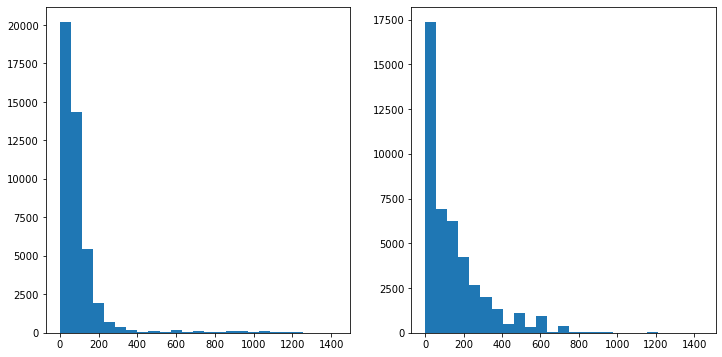

In [39]:
#check out what the distribution looks like.
fig, ax = plt.subplots(1,2, figsize =(12,6))

bin_nr = int(np.sqrt(len(data)))

ax[0].hist(data["nwspol"], bins=25);
ax[1].hist(data["netustm"], bins=25);

Pretty skewed! It could also be that there are  "666" / "777" etc values in there (meaning: I dont know, or, I dont want to say etc). According to the [documentation](http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS9e03.1&mode=documentation&top=yes) they should all have 4 digits. I will check out the three digits aswell, just to be sure.

The cell below shows there are only three-digit values (which should/could be actual reported minutes). As there are very little of these values, and they are not the most extreme values in the data, I'll treat them as being actual reported minutes. 

In [40]:
non_values = [555, 666, 777, 888, 999, 5555, 6666, 7777, 8888, 9999]

for i in range(len(data)):
    for j in min_cols:
        if data[j][i] in non_values:
            print(data[j][i], j, i)

555.0 nwspol 7094
555.0 nwspol 18842
888.0 nwspol 20695
999.0 nwspol 29171
888.0 nwspol 30323
777.0 netustm 33273
555.0 netustm 34071


Alternative approach to bring back the range of the data (other than normalisation) is to take the natural log (see plots below).I will store the natural_log minutes in a seperate dataframe.

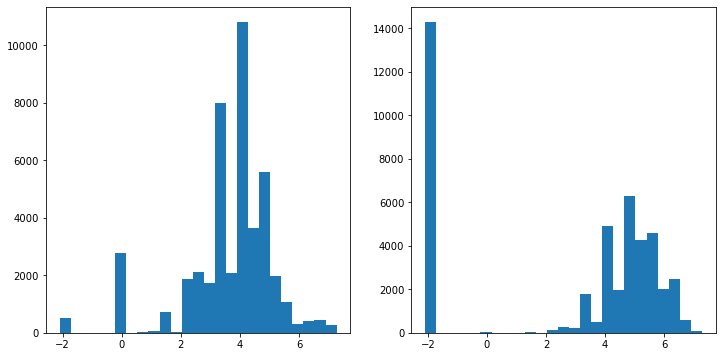

In [41]:
#see what it would look like.
log_nws = [np.log(x) if x!=0 else 0 for x in data["nwspol"]] #take natural log
log_net = [np.log(x) if x!=0 else 0 for x in data["netustm"]] #take natural log

#check out what the data looks like.
fig, ax = plt.subplots(1,2, figsize =(12,6))

bin_nr = int(np.sqrt(len(data)))

ax[0].hist(log_nws, bins=25);
ax[1].hist(log_net, bins=25);

I will probalby have to try both. Therefore I'll save those logs in a new column, and save the normalized data in two seperate columns: 

In [42]:
alternative_minutes_df = pd.DataFrame(columns=["nwspol_LOG", "netustm_LOG"], index=range(len(data)))

alternative_minutes_df["nwspol_LOG"] = log_nws
alternative_minutes_df["netustm_LOG"] = log_net

In [43]:
alternative_minutes_df.head()

,nwspol_LOG,netustm_LOG
0,4.787492,5.192957
1,4.787492,4.787492
2,3.401197,-2.091919
3,3.401197,4.787492
4,3.401197,5.192957


## Handle isco08 and isco08p 
isco08 and isco08p turn out to be the occupation of the participant or his/her partner. the columns have 509 / 521 unique values, though the values range from 0 to 9629 (see the two cells below). 
Using the LabelEncoder will reduce the range quite a lot, so I'll opt for that.

In [44]:
metadata[(metadata["shorthand"]=="isco08")|(metadata["shorthand"]=="isco08p")]

,shorthand,nom_or_scale,full_text
368,isco08,nominal,"Occupation, ISCO08"
426,isco08p,nominal,"Occupation partner, ISCO08"


In [45]:
print(data["isco08"].describe(), "\n")

print("unique values:", len(data["isco08"].unique()))

count    44387.000000
mean      4411.970394
std       2755.555650
min          0.000000
25%       2341.000000
50%       4211.000000
75%       7112.000000
max       9629.000000
Name: isco08, dtype: float64 

unique values: 590


In [46]:
print(data["isco08p"].describe(), "\n")

print("unique values:", len(data["isco08p"].unique()))

count    44387.000000
mean      1653.242498
std       2653.629767
min          0.000000
25%          0.123450
50%          0.123450
75%       2635.000000
max       9629.000000
Name: isco08p, dtype: float64 

unique values: 521


In [47]:
data[["isco08","isco08p"]] = data[["isco08","isco08p"]].apply(LabelEncoder().fit_transform)

print(data["isco08"].max()) #check max values (should be 1 shorter than unique (starts at 0))
print(data["isco08p"].max()) #check max values (should be 1 shorter than unique (starts at 0))

589
520


In [48]:
data[["isco08","isco08p"]].head()

,isco08,isco08p
0,102,1
1,159,104
2,350,1
3,589,1
4,280,1


## Handling Ancestry anctry1 / 2

In [49]:
print(data["anctry1"].describe(), "\n")

print("unique values:", len(data["anctry1"].unique()))

count     44387.000000
mean      14521.422294
std       14284.178283
min           0.123450
25%       11070.000000
50%       13040.000000
75%       15040.000000
max      444444.000000
Name: anctry1, dtype: float64 

unique values: 215


In [50]:
data[["anctry1","anctry2"]] = data[["anctry1","anctry2"]].apply(LabelEncoder().fit_transform)

print(data["anctry1"].max()) #check max values (should be 1 shorter than unique (starts at 0))
print(data["anctry2"].max()) #check max values (should be 1 shorter than unique (starts at 0))

214
204


In [51]:
data[["anctry1","anctry2"]].head() 

,anctry1,anctry2
0,23,0
1,23,0
2,3,0
3,3,0
4,110,0


## Handling out of range No Answers

See if and where the no answer-like encodings are in the dataframe.

In [52]:
#NOTE: This takes some time to compute (over 15 minutes)! 
non_values = [444, 555, 666, 777, 888, 999, 4444, 5555, 6666, 7777, 8888, 9999, 44444, 55555, 66666, 77777, 88888, 99999, 444444]

col = []
value = []
ind = []

for i in range(len(data)):
    for j in data.columns:
        if data[j][i] in non_values:
            col.append(j)
            value.append(data[j][i])
            ind.append(i)

In [53]:
df_no_answer = pd.DataFrame(list(zip(col, value, ind)), columns = ["col", "value", "index"])

In [54]:
df_no_answer.describe()

,value,index
count,475.000000,475.000000
mean,4710.320000,23893.972632
std,1917.307927,13019.269633
min,444.000000,5.000000
25%,5555.000000,16272.500000
50%,5555.000000,23983.000000
75%,5555.000000,35073.500000
max,9999.000000,44246.000000


That are quite some elements! Check them out some further. 
For example: 444, 555, 777, 888 and 999 could also be true values. See in what columns they are.

In [55]:
df_no_answer.groupby("value").count()

,col,index
value,,
444.0,13,13
555.0,65,65
777.0,1,1
888.0,2,2
999.0,1,1
5555.0,390,390
7777.0,2,2
9999.0,1,1


In [56]:
for i in non_values:
    print("risk value:", i, "\n", df_no_answer[df_no_answer["value"]==i].groupby("col").count(), "\n===================\n") #444  are true values. So leave those alone.

risk value: 444 
          value  index
col                  
isco08      11     11
isco08p      2      2 

risk value: 555 
          value  index
col                  
isco08      60     60
netustm      1      1
nwspol       2      2
wkhct        2      2 

risk value: 666 
 Empty DataFrame
Columns: [value, index]
Index: [] 

risk value: 777 
          value  index
col                  
netustm      1      1 

risk value: 888 
         value  index
col                 
nwspol      2      2 

risk value: 999 
         value  index
col                 
nwspol      1      1 

risk value: 4444 
 Empty DataFrame
Columns: [value, index]
Index: [] 

risk value: 5555 
           value  index
col                   
edulvlb      88     88
edulvlfb    144    144
edulvlmb     98     98
edulvlpb     60     60 

risk value: 6666 
 Empty DataFrame
Columns: [value, index]
Index: [] 

risk value: 7777 
         value  index
col                 
emplno      2      2 

risk value: 8888 
 Empty DataFram

Checked using: http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS9e03.1&mode=documentation&top=yes

and crosschecking the questions, find the full name by using eg,
metadata[metadata["shorthand"] =="edufbil1"]<br>

The three digit numbers are all true values.<br>
555 exists in the education-level-columns.<br>
5555: to do with education --> meaning: "other".(1 digit extra compared to "normal"values in this column). <br>
7777: emplno --> true value (number employees) <br>
9999: number of people responsible for in job --> should be true value (99999 is 'no answer') <br>
444444: anctry 1 and 2 --> "not classifiable". (1 digit extra compared to "normal"values in this column). <br>

Approach: <br>
444444 replace by 0.4 <br>
5555 in education columns, replace by 0.5 <br>

In [57]:
data[["edulvlb", "edulvlfb", "edulvlmb", "edulvlpb"]] = data[["edulvlb", "edulvlfb", "edulvlmb", "edulvlpb"]].replace(to_replace = 5555, value = 0.5) 

In [58]:
data[["anctry1", "anctry2"]] = data[["anctry1", "anctry2"]].replace(to_replace = 444444, value = 0.4) 

In [59]:
#check if it went oke:

print("4444:", len(data[data["anctry1"]==444444]))
print("0.4:", len(data[data["anctry1"]==0.4]))
print("4444:",len(data[data["anctry2"]==444444]))
print("0.4:", len(data[data["anctry2"]==0.4]))


for i in ["edulvlb", "edulvlfb", "edulvlmb", "edulvlpb"]:
    print("5555:", len(data[data[i]==5555]))
    print("0.5", len(data[data[i]==0.5]))    

4444: 0
0.4: 0
4444: 0
0.4: 0
5555: 0
0.5 88
5555: 0
0.5 144
5555: 0
0.5 98
5555: 0
0.5 60


## Double check the dataframe

Decide on the preprocessing approach by double checking what values we're left with.

In [60]:
#check if all columns are numerical:
data.dtypes.sort_values()

cntry         int32
region        int32
fbrncntb      int32
lnghom2       int32
lnghom1       int32
cntbrthc      int32
ctzshipc      int32
mbrncntb      int32
isco08p       int64
isco08        int64
anctry2       int64
anctry1       int64
marsts      float64
rshipa3     float64
rshipa2     float64
yrbrn12     float64
chldhhe     float64
yrbrn11     float64
domicil     float64
yrbrn10     float64
edulvlb     float64
yrbrn9      float64
eisced      float64
edupl2      float64
yrbrn8      float64
yrbrn7      float64
eduyrs      float64
yrbrn6      float64
chldhm      float64
rshipa4     float64
rshipa5     float64
rshipa6     float64
iccohbt     float64
icpart2     float64
dvrcdeva    float64
lvgptnea    float64
rshpsgb     float64
rshpsfi     float64
rshpsts     float64
marstfi     float64
icpart1     float64
rshipa11    float64
marstgb     float64
maritalb    float64
rshipa10    float64
rshipa9     float64
rshipa8     float64
rshipa7     float64
rshipa12    float64
yrbrn5      float64


In [61]:
#create df with some basic characteristics and complete question per feature (data_end)
cols = ["shorthand", "nans_", "max_", "median_", "mean_"]
df = pd.DataFrame(columns=cols, index=range(len(data.columns)))

for i in range(len(data.columns)):
    df.loc[i].shorthand = data.iloc[:,i].name
    df.loc[i].max_ = data.iloc[:,i].max()
    df.loc[i].median_ = data.iloc[:,i].median()
    df.loc[i].mean_ = data.iloc[:,i].mean()
    df.loc[i].nans_ = data.iloc[:,i].isnull().sum()

In [62]:
data_end = pd.merge(df, metadata, on="shorthand", how="left")

In [63]:
len(data_end)

375

In [64]:
data_end.sort_values(by=["nom_or_scale","max_"], ascending=False)

,shorthand,nans_,max_,median_,mean_,nom_or_scale,full_text
299,njbspv,0,18000,0.12345,6.66022,scale,Number of people responsible for in job
295,emplno,0,7777,0.12345,0.81878,scale,Number of employees respondent has/had
134,livecnta,0,2017,0.12345,199.615,scale,What year you first came to live in country
234,yrbrn2,0,2017,1959,1514.75,scale,Year of birth of second person in household
235,yrbrn3,0,2017,0.12345,852.251,scale,Year of birth of third person in household
236,yrbrn4,0,2017,0.12345,498.252,scale,Year of birth of fourth person in household
237,yrbrn5,0,2017,0.12345,178.609,scale,Year of birth of fifth person in household
238,yrbrn6,0,2017,0.12345,59.8066,scale,Year of birth of sixth person in household
239,yrbrn7,0,2017,0.12345,20.2267,scale,Year of birth of seventh person in household
243,yrbrn11,0,2017,0.12345,0.530932,scale,Year of birth of eleventh person in household


In [65]:
#store the dataframe in CSV as some steps take long to compute
data.to_csv('./data/climate_full_fill_adj.csv')

# Step 2: Preprocessing

Based on the above:

I find a max-range from 0-10 acceptable. that means that a lot of columns need to be normalized (brought back to range of 1-10). 
<!--  
<ul>
    <li>Nominal columns (categories) that have a maximum above 10 should be normalized (brought into a range of 0-10)</li>
    <li>Scale columns (continuous variable) should first be discretized, and can than be normalized aswell (I dont know if they are normally distributed (so not sure if you could standardize at all) ánd I'd like to keep the original distribution of the data)</li>
</ul> -->
        

In [66]:
data_adj = pd.read_csv('./data/climate_full_fill_adj.csv')

In [67]:
data_adj.head()

,Unnamed: 0,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,0,0,120.0,4.0,180.00000,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.00000,1.00000,1.00000,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.00000,0.12345,2.00000,0.12345,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,32,2.0,40,2010.00000,42,142,2.0,2.0,40,2.0,41,1.0,5.0,1.0,8.0,4.0,10.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,0.12345,4.0,4.0,8.0,4.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,0.12345,

In [68]:
data_adj = data_adj.drop("Unnamed: 0", axis=1)
data_adj.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,0,120.0,4.0,180.00000,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.00000,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.12345,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.00000,1.00000,1.00000,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.00000,0.12345,2.00000,0.12345,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,32,2.0,40,2010.00000,42,142,2.0,2.0,40,2.0,41,1.0,5.0,1.0,8.0,4.0,10.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,0.12345,4.0,4.0,8.0,4.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,0.12345,0.12345,0.123

##### ADJUSTMENT: NaN to -1

In [69]:
data_adj = data_adj.replace(0.12345, -1)
data_adj.head()

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,0,120.0,4.0,180.0,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.0,-1.0,2.0,-1.0,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,32,2.0,40,2010.0,42,142,2.0,2.0,40,2.0,41,1.0,5.0,1.0,8.0,4.0,10.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,-1.0,4.0,4.0,8.0,4.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,4.0,4.0,4.0,-1.0,3.0,4.0,4.0,2.0,55.0,-1.0,55.0,-1.0,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,34.0,1982.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0

## Isolate target (y) from predictors (X)

The column I want to predict should not be scaled. This is the columns: <br>
<b>"Do you think world's climate is changing"</b><br>
Variable name: clmchng<br>

Meaning of the outcomes:<br>
1 = Definitely changing	<br>
2 = Probably changing<br>
3 = Probably not changing<br>
4 =	Definitely not changing	<br><br>
7 =	Refusal<br>
8 =	Don't know<br>
9 =	No answer<br>

-1 = Filled by me, used to be empty value<br>

Isolate this column from the rest of the dataset, and see whether the data is unbalanced and undersampling of certain categories is needed.

In [70]:
#set X (predictors) and y (target)
X = data_adj.drop("clmchng", axis=1)
y = data_adj["clmchng"]

In [71]:
len(X.columns)

374

## Discretisize y and create X_scaled variable

Scale X features 
Note: some of the features (columns) are already processed using the LabelEncoder, these should not also be subject to the MinMaxScaler. Therefore first 'deselect' those columns from X and then re-joining them.

In [72]:
encoded_cols = ['cntry', 'ctzshipc', 'cntbrthc', 'lnghom1', 'lnghom2', 'fbrncntb', 'mbrncntb', 'region', "isco08","isco08p", "anctry1","anctry2"]
X_to_scale = X.drop(encoded_cols, axis=1)
X_dont_scale = X[encoded_cols]

In [73]:
cols_scale = list(X_to_scale.columns)
print(cols_scale)

['nwspol', 'netusoft', 'netustm', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgva', 'actrolga', 'psppipla', 'cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 'vote', 'prtvtbat', 'prtvtcbe', 'prtvtfch', 'prtvtdcz', 'prtvede1', 'prtvede2', 'prtvtfee', 'prtvtdes', 'prtvtdfi', 'prtvtcfr', 'prtvtbgb', 'prtvtehu', 'prtvtbie', 'prtvtcil', 'prtvtbis', 'prtvtbit', 'prtvblt1', 'prtvblt2', 'prtvblt3', 'prtvtfnl', 'prtvtbno', 'prtvtdpl', 'prtvtcpt', 'prtvtdru', 'prtvtbse', 'prtvtesi', 'contplt', 'wrkprty', 'wrkorg', 'badge', 'sgnptit', 'pbldmn', 'bctprd', 'pstplonl', 'clsprty', 'prtclcat', 'prtclcbe', 'prtclfch', 'prtcldcz', 'prtclede', 'prtclfee', 'prtclees', 'prtcldfi', 'prtclefr', 'prtclbgb', 'prtclfhu', 'prtcldie', 'prtcldil', 'prtclbis', 'prtclcit', 'prtclblt', 'prtclenl', 'prtclbno', 'prtclgpl', 'prtclept', 'prtcldru', 'prtclbse', 'prtclesi', 'prtdgcl', 'lrscale', 'stflife', 'stfeco', 'stfgov', 'stfdem', 'stfedu', 'stfhlth', 'gincdif', 'mnrgtjb', 'fr

In [74]:
#create array to feed to MinMaxScaler (normalization)
X_to_scale = X_to_scale.to_numpy()

In [75]:
scaler = MinMaxScaler(feature_range=(0,10))
scaled_array = scaler.fit(X_to_scale)
scaled_array2 = scaler.transform(X_to_scale)
scaled_df = pd.DataFrame(scaled_array2, columns=cols_scale)

In [76]:
scaled_df.head() #check

,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,blgetmg,facntr,mocntr,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,regunit,intewde
0,0.846746,8.333333,1.256072,8.181818,8.181818,3.636364,4.0,5.000000,5.000000,5.000000,6.666667,6.363636,7.272727,0.909091,2.727273,8.181818,9.090909,10.000000,10.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.000000,10.000000,6.666667,6.666667,10.0,6.666667,6.666667,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091,5.454545,4.545455,4.545455,6.363636,3.636364,5.454545,3.333333,10.000000,3.333333,10.000000,3.333333,5.454545,4.0,4.0,4.0,10.000000,10.000000,10.000000,5.454545,8.75,5.714286,6.666667,10.0,6.0,6.666667,10.0,5.454545,7.272727,10.000000,0.000000,10.000000,0.000000,0.909091,10.00,10.00,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.000000,10.000000,9.965312,10.000000,10.000000,10.000000,3.333333,10.000000,3.333333,8.181818,0.892857,10.000000,1.071429,1.071429,0.357143,1.071429,0.357143,0.357143,0.357143,5.000000,6.666667,8.333333,8.333333,5.000000,5.000000,5.000000,6.666667,0.0,8.333333,0.892857,8.181818,8.333333,10.000000,10.000000,0.909091,0.909091,0.909091,3.333333,3.333333

In [77]:
scaled_df.min().sort_values(ascending=True)

nwspol      0.0
rshipa10    0.0
rshipa9     0.0
rshipa8     0.0
rshipa7     0.0
rshipa6     0.0
rshipa5     0.0
rshipa4     0.0
rshipa3     0.0
rshipa11    0.0
rshipa2     0.0
yrbrn11     0.0
yrbrn10     0.0
yrbrn9      0.0
yrbrn8      0.0
yrbrn7      0.0
yrbrn6      0.0
yrbrn5      0.0
yrbrn4      0.0
yrbrn12     0.0
rshipa12    0.0
icpart1     0.0
rshpsts     0.0
edctn       0.0
pdwrk       0.0
eduyrs      0.0
edupl2      0.0
eisced      0.0
edulvlb     0.0
domicil     0.0
chldhhe     0.0
chldhm      0.0
maritalb    0.0
marstgb     0.0
marstfi     0.0
marsts      0.0
iccohbt     0.0
icpart2     0.0
dvrcdeva    0.0
lvgptnea    0.0
rshpsgb     0.0
rshpsfi     0.0
yrbrn3      0.0
uempla      0.0
yrbrn2      0.0
agea        0.0
bnlwinc     0.0
ubspunp     0.0
ubspedu     0.0
ubsppay     0.0
ub20unp     0.0
ub20edu     0.0
ub20pay     0.0
ub50unp     0.0
eduunmp     0.0
ub50edu     0.0
ubunp       0.0
ubedu       0.0
ubpay       0.0
admub       0.0
bennent     0.0
lbenent     0.0
uentrjb 

In [78]:
scaled_df.max().sort_values(ascending=False)

prtclfee    10.0
prtclbno    10.0
prtclesi    10.0
prtvtbse    10.0
prtvtesi    10.0
uemplwk     10.0
prtclbse    10.0
prtvtdes    10.0
prtvtfee    10.0
prtvtbno    10.0
vteubcmb    10.0
vteumbgb    10.0
vteurmmb    10.0
elgwind     10.0
elgsun      10.0
rfgbfml     10.0
elghydr     10.0
elgngas     10.0
elgbio      10.0
wrpwrct     10.0
wrenexp     10.0
wrdpimp     10.0
wrdpfos     10.0
elgcoal     10.0
rdcenr      10.0
elgnuc      10.0
intewde     10.0
rfgfrpc     10.0
gvrfgap     10.0
dscrlng     10.0
dscretn     10.0
dscrage     10.0
dscrgnd     10.0
dscrsex     10.0
dscrdsb     10.0
dscroth     10.0
dscrdk      10.0
dscrref     10.0
dscrnap     10.0
dscrna      10.0
ctzcntr     10.0
brncntr     10.0
livecnta    10.0
blgetmg     10.0
facntr      10.0
wrntdis     10.0
mocntr      10.0
clmthgt1    10.0
wrinspw     10.0
wrtcfl      10.0
lbenent     10.0
bennent     10.0
admub       10.0
ubpay       10.0
ubedu       10.0
ubunp       10.0
ub50pay     10.0
ub50edu     10.0
ub50unp     10

In [79]:
scaled_df["netustm"][3]

0.8396946564885496

In [80]:
# join the two back together
scaled_df = pd.concat([scaled_df, X_dont_scale], axis=1, join="inner")

In [81]:
scaled_df.head()

,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,blgetmg,facntr,mocntr,gvrfgap,rfgfrpc,rfgbfml,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmthgt1,clmthgt2,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,sbsrnen,banhhap,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,regunit,intewde,cntry,ctzshipc,cntbrthc,lnghom1,lnghom2,fbrncntb,mbrncntb,region,isco08,isco08p,anctry1,anctry2
0,0.846746,8.333333,1.256072,8.181818,8.181818,3.636364,4.0,5.000000,5.000000,5.000000,6.666667,6.363636,7.272727,0.909091,2.727273,8.181818,9.090909,10.000000,10.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.000000,10.000000,6.666667,6.666667,10.0,6.666667,6.666667,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091,5.454545,4.545455,4.545455,6.363636,3.636364,5.454545,3.333333,10.000000,3.333333,10.000000,3.333333,5.454545,4.0,4.0,4.0,10.000000,10.000000,10.000000,5.454545,8.75,5.714286,6.666667,10.0,6.0,6.666667,10.0,5.454545,7.272727,10.000000,0.000000,10.000000,0.000000,0.909091,10.00,10.00,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.000000,10.000000,9.965312,10.000000,10.000000,10.000000,3.333333,10.000000,3.333333,8.181818,0.892857,10.000000,1.071429,1.071429,0.357143,1.071429,0.357143,0.357143,0.357143,5.000000,6.666667,8.333333,8.333333,5.000000,5.000000,5.000000,6.666667,0.0,8.33

In [82]:
#check if it went right
print(X.shape)
print(scaled_df.shape)

(44387, 374)
(44387, 374)


In [83]:
scaled_df.dtypes #check

nwspol      float64
netusoft    float64
netustm     float64
ppltrst     float64
pplfair     float64
pplhlp      float64
polintr     float64
psppsgva    float64
actrolga    float64
psppipla    float64
cptppola    float64
trstprl     float64
trstlgl     float64
trstplc     float64
trstplt     float64
trstprt     float64
trstep      float64
trstun      float64
vote        float64
prtvtbat    float64
prtvtcbe    float64
prtvtfch    float64
prtvtdcz    float64
prtvede1    float64
prtvede2    float64
prtvtfee    float64
prtvtdes    float64
prtvtdfi    float64
prtvtcfr    float64
prtvtbgb    float64
prtvtehu    float64
prtvtbie    float64
prtvtcil    float64
prtvtbis    float64
prtvtbit    float64
prtvblt1    float64
prtvblt2    float64
prtvblt3    float64
prtvtfnl    float64
prtvtbno    float64
prtvtdpl    float64
prtvtcpt    float64
prtvtdru    float64
prtvtbse    float64
prtvtesi    float64
contplt     float64
wrkprty     float64
wrkorg      float64
badge       float64
sgnptit     float64


In [84]:
column_order = list(scaled_df.columns)

In [85]:
scaled_df.dtypes.sort_values(ascending=False)

bennent     float64
dscrref     float64
dscrrlg     float64
dscrlng     float64
dscretn     float64
dscrage     float64
dscrgnd     float64
dscrsex     float64
dscrdsb     float64
dscroth     float64
dscrdk      float64
dscrnap     float64
eneffap     float64
dscrna      float64
ctzcntr     float64
brncntr     float64
livecnta    float64
blgetmg     float64
facntr      float64
mocntr      float64
gvrfgap     float64
rfgfrpc     float64
dscrntn     float64
dscrrce     float64
dscrgrp     float64
pray        float64
imbgeco     float64
imueclt     float64
imwbcnt     float64
happy       float64
sclmeet     float64
inprdsc     float64
sclact      float64
crmvct      float64
aesfdrk     float64
health      float64
hlthhmp     float64
atchctr     float64
atcherp     float64
rlgblg      float64
rlgdnm      float64
rlgblge     float64
rlgdnme     float64
rlgdgr      float64
rlgatnd     float64
rfgbfml     float64
rdcenr      float64
lbenent     float64
slvuemp     float64
gvsrdcc     float64


In [86]:
#STORE THE SCALED X VALUES IN VARIABLE X_SCALED
X_scaled = scaled_df

In [87]:
#y is interpreted as continuous because NaNs are filled with 0.12345. Turning i into integers solves this issue:
y=y.astype('int64')
y.value_counts()

 1    24585
 2    15764
 3     1962
-1     1098
 4      978
Name: clmchng, dtype: int64

In [88]:
#XGBoost can't handle the -1, so for y I will change the -1 to 5
print(y.min(), y.max())
y = y.replace(-1,5)
print(y.min(), y.max())

-1 4
1 5


## Check for imbalanced dataset

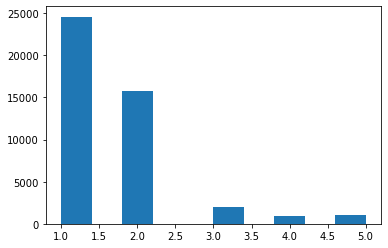

In [89]:
#check out the target variable to see if it's imbalanced. And.. it is. Quite heavily: majority thinks the climate is def/prob changing.
# Will probably need to undersample the majority classes.
plt.hist(y);

In [90]:
# check how many observations are in the smallest classes (= no answer (0.12345) and definitely not changing (4))
y.value_counts()

1    24585
2    15764
3     1962
5     1098
4      978
Name: clmchng, dtype: int64

# Step 3: Building models: all data included

Choose the model, start with a model that is (somewhat) robust to multicolinearity: decision trees and random forests.
Trees are also not easily influenced by outliers, which is nice aswell.

In [91]:
print(type_of_target(y))
print(type_of_target(X))
print(type_of_target(X_scaled))

multiclass
continuous-multioutput
continuous-multioutput


## Model functions

### Random_forest

In [92]:
def Random_forest(X, y, random_states):
    """
    IN: 
    Dataframe with features (X), dataframe with predictor (y) and a list with random states. 
    The latter also defines the number of runs, so choose wisely.
    
    OUT: 
    Dataframe with average accuracy, recall and precision scores on both the test and train data.
    Dataframe with the top 10 features of each round
    
    PRINT:
    It will print the classification report per round
    It will print a plot with the most frequently in the top 10 occuring features
    
    """ 
    #lists for performances on test set
    recall_forest = []
    accuracy_forest = []
    precision_forest = []
    
    #lists for performances on train set
    recall_forest_train = []
    accuracy_forest_train = []
    precision_forest_train = []
    
    #top features 
    top_features = pd.Series(dtype='float')

    random_states = random_states

    for i in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
        
        model_forest = RandomForestClassifier() #train the model
        model_forest.fit(X_train, y_train) #fit model to training set
        
        #test model on test and train set
        y_pred = model_forest.predict(X_test) #test model on test set
        y_pred_train = model_forest.predict(X_train) #test model on train set

        #accuracy, recall and precision on test set
        accuracy_forest.append(accuracy_score(y_test, y_pred))
        recall_forest.append(recall_score(y_test, y_pred, average='macro'))
        precision_forest.append(precision_score(y_test, y_pred, average='macro'))
        print("Random state:", i, "\n", 
              classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), 
              "\n====================================================\n")     
              
        #accuracy, recall and precision on train set
        accuracy_forest_train.append(accuracy_score(y_train, y_pred_train))
        recall_forest_train.append(recall_score(y_train, y_pred_train, average='macro'))
        precision_forest_train.append(precision_score(y_train, y_pred_train, average='macro'))
        
        
        #feature importances 
        feature_names = [f'{X.columns[j]}' for j in range(X.shape[1])]
        importances = model_forest.feature_importances_
        std = np.std([
            tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
        forest_importances = pd.Series(importances, index=feature_names) 
             
        
        #identify highest importances
        top = forest_importances.sort_values(ascending=False)
        top_features = top_features.append(top.head(10))

    
    
    #score_dict_forest = {"Accuracy":np.average(accuracy_forest),"Recall":np.average(recall_forest), "Precision":np.average(precision_forest)}
    score_df_forest = pd.DataFrame({"Model":["Random_Forest","Random_Forest_train"],
                                      "Accuracy":[np.average(accuracy_forest), np.average(accuracy_forest_train)],
                                      "Recall":[np.average(recall_forest), np.average(recall_forest_train)], 
                                      "Precision":[np.average(precision_forest), np.average(precision_forest_train)],  
                                     "Random_state":[random_states, random_states]
                                     })
    
    #turn top features-series into a dataframe
    top_features_df = top_features.to_frame().reset_index()
    top_features_df["model"]= "random_forest"
    top_features_df.columns = ["feature", "importance", "model"]
    
    # plot the top features
    high_low = top_features_df.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    ax.set_title(f'Occurences of features in the top 10 \n {top_features_df["model"][0]}\n(N={len(random_states)} rounds)')
    ax.set_ylabel("Count")
    plt.show();
    
    #plot the scores
    score_df_forest.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {score_df_forest["Model"][0]}')
    plt.ylabel("score")
    plt.show();
    
    return score_df_forest, top_features_df


### XG_Boost

Two versions because the internet was not fully in agreement about how to use this model. The version2 was made after the presentation, so is not used/plotted extensively. It does seem to score better.

In [93]:
def XG_Boost(X, y, random_states, params):  
    """
    IN: 
    Dataframe with features (X) 
    Dataframe with predictor (y) 
    List with random states (also defines the number of runs, so choose wisely!)
    params: dictionary with parameters for XQBoost. Eg:
   
         params = {'max_depth': 5, #max depth of a tree
         'objective': 'multi:softmax',  #error evaluation for multiclass training
         'num_class': 6, #number of different outcomes in the target variable (# classes)
         'n_gpus': 0, #Set number of GPUs if available
         "colsample_bytree":0.3,
         "learning_rate":0.1,
         "eval_metric":'mlogloss' #evaluation metric
                  }
    
    OUT: 
    Dataframe with average accuracy, recall and precision scores on both the test and train data.
    Dataframe with the top 10 features of each round
     
    PRINT:
    It will print the classification report per round
    It will print a plot with the most frequently in the top 10 occuring features.
    
    SAVE:
    The plot will be saved in pictures folder
    
   """

    #lists for performances on test set
    recall_XGBoost = []
    accuracy_XGBoost = []
    precision_XGBoost = [] 
    
    #lists for performances on test set
    recall_XGBoost_train = []
    accuracy_XGBoost_train = []
    precision_XGBoost_train = []
    
    top_features_XGBoost = pd.Series(dtype='float')

    random_states = random_states

    for i in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data

     
        dtrain = xgb.DMatrix(data=X_train, label=y_train)
        dtest = xgb.DMatrix(data=X_test)
        dtrain_eval = xgb.DMatrix(data=X_train)
        

        params = {'max_depth': 5, #max depth of a tree
        'objective': 'multi:softmax',  #error evaluation for multiclass training
        'num_class': 6, #number of target classes
        'n_gpus': 0, #Set number of GPUs if available
        "colsample_bytree":0.3,
        "learning_rate":0.1,
        "eval_metric":'mlogloss' #evaluation metric
                 }

        bst = xgb.train(params, dtrain) #booster
        y_pred = bst.predict(dtest) #test model on test set
        y_pred_train = bst.predict(dtrain_eval)

       
        #accuracy, recall and precision on test set
        accuracy_XGBoost.append(accuracy_score(y_test, y_pred))
        recall_XGBoost.append(recall_score(y_test, y_pred, average='macro'))
        precision_XGBoost.append(precision_score(y_test, y_pred, average='macro'))
        print("Random state:", i, "\n", 
              classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), #changed these around!
              "\n====================================================\n")


        #accuracy, recall and precision on train set
        accuracy_XGBoost_train.append(accuracy_score(y_train, y_pred_train))
        recall_XGBoost_train.append(recall_score(y_train, y_pred_train, average='macro'))
        precision_XGBoost_train.append(precision_score(y_train, y_pred_train, average='macro'))

        #feature importance
        feature_important = bst.get_score(importance_type='weight') #dictionary
        top = pd.Series(feature_important).nlargest(n=10, keep="all") #keep all --> when n+1 has same score as n
        top_features_XGBoost = top_features_XGBoost.append(top.head(10))
           
    
    #put the scores into a dataframe
    score_df_XGBoost = pd.DataFrame({"Model":["XGBoost","XGBoost_train"],
                                      "Accuracy":[np.average(accuracy_XGBoost), np.average(accuracy_XGBoost_train)],
                                      "Recall":[np.average(recall_XGBoost), np.average(recall_XGBoost_train)], 
                                      "Precision":[np.average(precision_XGBoost), np.average(precision_XGBoost_train)],  
                                     "Random_state":[random_states, random_states]
                                     })
    
    #turn top features-series into a dataframe
    top_features_df = top_features_XGBoost.to_frame().reset_index()
    top_features_df["model"]= "XGBoost"
    top_features_df.columns = ["feature", "importance", "model"]
    
   
    # plot the top features
    high_low = top_features_df.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    ax.set_title(f'Occurences of features in the top 10 \n {top_features_df["model"][0]}\n(N={len(random_states)} rounds)')
    ax.set_ylabel("Count")
    plt.show();
    
    #plot the scores
    score_df_XGBoost.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {score_df_XGBoost["Model"][0]}')
    plt.ylabel("score")
    plt.show();
    
    
    return score_df_XGBoost, top_features_df 


### XG_Boost_version2

In [94]:
def XG_Boost_version2(X, y, random_states, params):  
    """
    IN: 
    Dataframe with features (X) 
    Dataframe with predictor (y) 
    List with random states (also defines the number of runs, so choose wisely!)
    Figure name (fig_name) in string format. This name will be used to save the plot.
    params: dictionary with parameters for XQBoost. Eg:
   
         params = {'max_depth': 5, #max depth of a tree
         'objective': 'multi:softmax',  #error evaluation for multiclass training
         'num_class': 6, #number of different outcomes in the target variable (# classes)
         'n_gpus': 0, #Set number of GPUs if available
         "colsample_bytree":0.3,
         "learning_rate":0.1,
         "eval_metric":'mlogloss' #evaluation metric
                  }
    
    OUT: 
    Dataframe with average accuracy, recall and precision scores on both the test and train data.
    Dataframe with the top 10 features of each round
     
    PRINT:
    It will print the classification report per round
    It will print a plot with the most frequently in the top 10 occuring features.
    
    SAVE:
    The plot will be saved in pictures folder
    
   """

    #lists for performances on test set
    recall_XGBoost = []
    accuracy_XGBoost = []
    precision_XGBoost = [] 
    
    #lists for performances on test set
    recall_XGBoost_train = []
    accuracy_XGBoost_train = []
    precision_XGBoost_train = []
    
    top_importances = []
    top_indices = []

    random_states = random_states
    
    for i in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
        
        model = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', max_depth=5, colsample_bytree=0.3,
         learning_rate = 0.1)
        result = model.fit(X_train, y_train)
        
        y_pred = result.predict(X_test)
        y_pred_train = result.predict(X_train) 
              
        #accuracy, recall and precision on test set
        accuracy_XGBoost.append(accuracy_score(y_test, y_pred))
        recall_XGBoost.append(recall_score(y_test, y_pred, average='macro'))
        precision_XGBoost.append(precision_score(y_test, y_pred, average='macro'))
        print("Random state:", i, "\n", 
              classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), #changed these around!
              "\n====================================================\n")

        #accuracy, recall and precision on train set
        accuracy_XGBoost_train.append(accuracy_score(y_train, y_pred_train))
        recall_XGBoost_train.append(recall_score(y_train, y_pred_train, average='macro'))
        precision_XGBoost_train.append(precision_score(y_train, y_pred_train, average='macro'))

        #feature importances 
        feature_names = [f'{X.columns[j]}' for j in range(X.shape[1])] #get the names
        importances = model.feature_importances_ #array of importances of all features
        
        importance_df = pd.DataFrame(importances, columns = ['importance']).reset_index() #put array into df
        top_importance_df = importance_df.sort_values(by="importance", ascending=False).head(10) # take top 10 features 
        
        list_top = top_importance_df["importance"].tolist()
        top_importances.extend(list_top)
        
        index_top = top_importance_df["index"].tolist()
        top_indices.extend(index_top)
        
    #put the scores into a dataframe
    score_df_XGBoost = pd.DataFrame({"Model":["XG_Boost","XG_Boost_train"],
                                      "Accuracy":[np.average(accuracy_XGBoost), np.average(accuracy_XGBoost_train)],
                                      "Recall":[np.average(recall_XGBoost), np.average(recall_XGBoost_train)], 
                                      "Precision":[np.average(precision_XGBoost), np.average(precision_XGBoost_train)],  
                                     "Random_state":[random_states, random_states]
                                     })

    
    top_features_XGBoost=pd.DataFrame({"indices":top_indices, "importance":top_importances})
    top_features_XGBoost["model"] = "XGBoost"
    top_features_XGBoost["feature"] = "abc"
    
    for i in range(len(top_features_XGBoost)):
        index_nr = top_features_XGBoost["indices"][i]
        top_features_XGBoost.loc[i, "feature"] = feature_names[index_nr]
        
        
    # plot the top features
    high_low = top_features_XGBoost.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    ax.set_title(f'Occurences of features in the top 10 \n {top_features_XGBoost["model"][0]}\n(N={len(random_states)} rounds)')
    ax.set_ylabel("Count")
    plt.show();
    
    #plot the scores
    score_df_XGBoost.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {score_df_XGBoost["Model"][0]}')
    plt.ylabel("score")
    plt.show();
    
    return  score_df_XGBoost, top_features_XGBoost

### get_fullname

In [95]:
def get_fullname(dataframe, metadata):
    """
    IN:
    The dataframe with the shorthands you want to decipher.
    The metadata-dataframe
    
    
    OUT:
    The input dataframe with fullnames attached
    """
    df = dataframe.groupby("feature").mean()
    fullname = pd.merge(df, metadata[["shorthand", "full_text"]], left_on= "feature", right_on="shorthand", how="left")
        
    return fullname

### Plot scores and top features

In [96]:
def plot_top_features(dataframe, figname):    # plot and save the top features  
    
    """
    IN: top_features dataframe, figname (string) used to save the plot.
    OUT: plots the figure and saves it in the ./pictures folder.
    
    """
    high_low = dataframe.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    plt.xticks(rotation=90)
    ax.set_title(f'Occurences of features in the top 10 \n {dataframe["model"][0]}')
    ax.set_ylabel("Count")
    fig.savefig(f'./pictures/{figname}.png', dpi=200) #save plot in pictures folder
    plt.show();
    return 

In [97]:
def plot_scores(dataframe, figname): #plot and save model-scores 
    """
    IN: top_features dataframe, figname (string) used to save the plot.
    OUT: plots the figure and saves it in the ./pictures folder.
    
    """
    dataframe.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {dataframe["Model"][0]}')
    plt.ylabel("score")
    fig.savefig(f'./pictures/{figname}.png', dpi=200) #save plot in pictures folder
    plt.show();
    return 

## Decision tree
Using X or X_scaled has very little effect on scores<br>
Both are heavily overfitted

### X (unscaled)

In [98]:
random_states = [5,16,27,38,49]

In [99]:
recall_tree = []
accuracy_tree = []
precision_tree = []

recall_tree_train = []
accuracy_tree_train = []
precision_tree_train = []

random_states = [5,16,27,38,49] 

for i in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
    
    model_tree = tree.DecisionTreeClassifier() #train the model
    model_tree.fit(X_train, y_train) #fit model to training set
    
    y_pred = model_tree.predict(X_test) #test model on test set
    y_pred_train = model_tree.predict(X_train) #test model on train set
    
    accuracy_tree.append(accuracy_score(y_test, y_pred))
    recall_tree.append(recall_score(y_test, y_pred, average='macro'))
    precision_tree.append(precision_score(y_test, y_pred, average='macro'))
    print("Random state:", i, "\n", 
          classification_report(y_test, y_pred, target_names=['Dont know', 'Def', 'Prob', 'Prob not', "Def not"]), 
          "\n====================================================\n")
    
    
    accuracy_tree_train.append(accuracy_score(y_train, y_pred_train))
    recall_tree_train.append(recall_score(y_train, y_pred_train, average='macro'))
    precision_tree_train.append(precision_score(y_train, y_pred_train, average='macro'))
    
    
print("MEAN SCORES TREE:", "\nAccuracy:", np.average(accuracy_tree),"\nRecall:", np.average(recall_tree), "\nPrecision:", np.average(precision_tree))

Random state: 5 
               precision    recall  f1-score   support

   Dont know       0.70      0.67      0.68      5028
         Def       0.47      0.49      0.48      3066
        Prob       0.11      0.12      0.12       391
    Prob not       0.99      0.97      0.98       199
     Def not       0.30      0.36      0.33       194

    accuracy                           0.58      8878
   macro avg       0.51      0.52      0.52      8878
weighted avg       0.59      0.58      0.59      8878
 

Random state: 16 
               precision    recall  f1-score   support

   Dont know       0.69      0.67      0.68      4927
         Def       0.47      0.49      0.48      3122
        Prob       0.14      0.15      0.15       382
    Prob not       0.98      0.99      0.98       195
     Def not       0.32      0.31      0.31       252

    accuracy                           0.58      8878
   macro avg       0.52      0.52      0.52      8878
weighted avg       0.58      0.58     

In [100]:
tree_scores = pd.DataFrame.from_dict({"Accuracy":[np.average(accuracy_tree), np.average(accuracy_tree_train)],
                                     "Recall":[np.average(recall_tree), np.average(recall_tree_train)],
                                     "Precision":[np.average(precision_tree),np.average(precision_tree_train)],
                                    "Model": ["Tree", "tree_train"]},
                                     
                                   orient="columns")
tree_scores

,Accuracy,Recall,Precision,Model
0,0.581505,0.520757,0.520764,Tree
1,1.000000,1.000000,1.000000,tree_train


### X_scaled

In [101]:
recall_tree = []
accuracy_tree = []
precision_tree = []

recall_tree_train = []
accuracy_tree_train = []
precision_tree_train = []

random_states = [5,16,27,38,49] 

for i in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state = i) #split data
    
    model_tree = tree.DecisionTreeClassifier() #train the model
    model_tree.fit(X_train, y_train) #fit model to training set
    
    y_pred = model_tree.predict(X_test) #test model on test set
    y_pred_train = model_tree.predict(X_train) #test model on train set
    
    accuracy_tree.append(accuracy_score(y_test, y_pred))
    recall_tree.append(recall_score(y_test, y_pred, average='macro'))
    precision_tree.append(precision_score(y_test, y_pred, average='macro'))
    print("Random state:", i, "\n", 
          classification_report(y_test, y_pred, target_names=['Dont know', 'Def', 'Prob', 'Prob not', "Def not"]), 
          "\n====================================================\n")
    
    
    accuracy_tree_train.append(accuracy_score(y_train, y_pred_train))
    recall_tree_train.append(recall_score(y_train, y_pred_train, average='macro'))
    precision_tree_train.append(precision_score(y_train, y_pred_train, average='macro'))
    
    
print("MEAN SCORES TREE:", "\nAccuracy:", np.average(accuracy_tree),"\nRecall:", np.average(recall_tree), "\nPrecision:", np.average(precision_tree))

Random state: 5 
               precision    recall  f1-score   support

   Dont know       0.69      0.66      0.68      5028
         Def       0.47      0.49      0.48      3066
        Prob       0.11      0.12      0.11       391
    Prob not       0.99      0.97      0.98       199
     Def not       0.29      0.35      0.32       194

    accuracy                           0.58      8878
   macro avg       0.51      0.52      0.52      8878
weighted avg       0.59      0.58      0.58      8878
 

Random state: 16 
               precision    recall  f1-score   support

   Dont know       0.69      0.68      0.68      4927
         Def       0.47      0.49      0.48      3122
        Prob       0.16      0.18      0.17       382
    Prob not       0.98      0.98      0.98       195
     Def not       0.31      0.28      0.29       252

    accuracy                           0.58      8878
   macro avg       0.52      0.52      0.52      8878
weighted avg       0.59      0.58     

In [102]:
tree_scores_scaled = pd.DataFrame.from_dict({"model": ["Tree", "Tree_train"], 
                                     "Accuracy":[np.average(accuracy_tree), np.average(accuracy_tree_train)],
                                     "Recall":[np.average(recall_tree), np.average(recall_tree_train)],
                                     "Precision":[np.average(precision_tree),np.average(precision_tree_train)]},
                                   orient="columns")
tree_scores_scaled

,model,Accuracy,Recall,Precision
0,Tree,0.579342,0.518544,0.518338
1,Tree_train,1.000000,1.000000,1.000000


## Random forest

### X (unscaled)

Random state: 5 
               precision    recall  f1-score   support

         Def       0.71      0.86      0.78      5028
        Prob       0.59      0.49      0.53      3066
    Prob not       0.70      0.04      0.07       391
     Def not       0.98      0.99      0.99       199
     No data       0.69      0.27      0.39       194

    accuracy                           0.68      8878
   macro avg       0.74      0.53      0.55      8878
weighted avg       0.68      0.68      0.66      8878
 

Random state: 16 
               precision    recall  f1-score   support

         Def       0.70      0.87      0.77      4927
        Prob       0.60      0.47      0.53      3122
    Prob not       0.76      0.06      0.11       382
     Def not       0.99      1.00      1.00       195
     No data       0.77      0.26      0.39       252

    accuracy                           0.68      8878
   macro avg       0.76      0.53      0.56      8878
weighted avg       0.67      0.68     

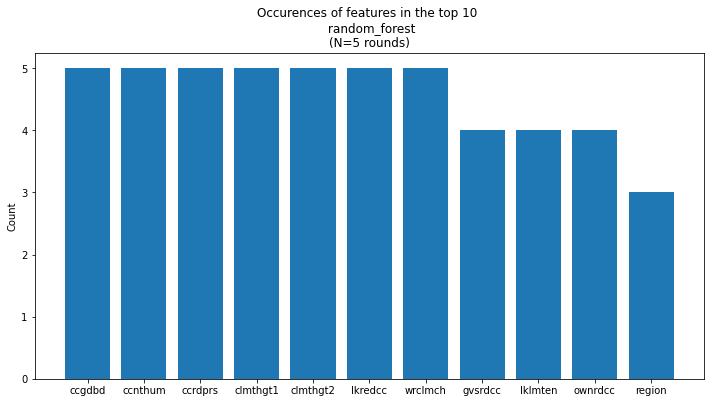

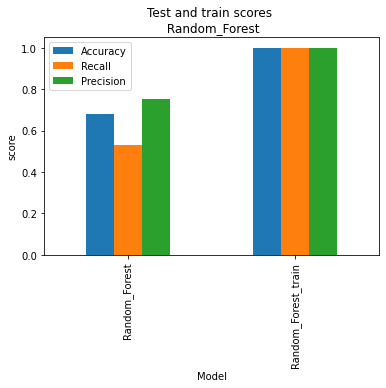

In [103]:
forest_scores, forest_features = Random_forest(X, y, random_states)

In [104]:
forest_scores

,Model,Accuracy,Recall,Precision,Random_state
0,Random_Forest,0.678779,0.530563,0.75257,"[5, 16, 27, 38, 49]"
1,Random_Forest_train,1.000000,1.000000,1.00000,"[5, 16, 27, 38, 49]"


In [105]:
get_fullname(forest_features, metadata)

,importance,shorthand,full_text
0,0.021558,ccgdbd,Climate change good or bad impact across world
1,0.017998,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,0.013063,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,0.013687,clmthgt1,How much thought about climate change before today
4,0.035968,clmthgt2,How much thought about climate change before today
5,0.009406,gvsrdcc,"How likely, governments in enough countries take action to reduce climate change"
6,0.010597,lklmten,"How likely, large numbers of people limit energy use"
7,0.010764,lkredcc,"Imagine large numbers of people limit energy use, how likely reduce climate change"
8,0.010377,ownrdcc,"How likely, limiting own energy use reduce climate change"
9,0.008931,region,Region


### X_scaled

Random state: 5 
               precision    recall  f1-score   support

         Def       0.72      0.86      0.78      5028
        Prob       0.60      0.49      0.54      3066
    Prob not       0.59      0.04      0.08       391
     Def not       0.99      1.00      0.99       199
     No data       0.64      0.29      0.40       194

    accuracy                           0.69      8878
   macro avg       0.71      0.54      0.56      8878
weighted avg       0.68      0.69      0.66      8878
 

Random state: 16 
               precision    recall  f1-score   support

         Def       0.70      0.86      0.77      4927
        Prob       0.59      0.47      0.52      3122
    Prob not       0.73      0.05      0.09       382
     Def not       0.99      1.00      1.00       195
     No data       0.77      0.28      0.41       252

    accuracy                           0.68      8878
   macro avg       0.76      0.53      0.56      8878
weighted avg       0.67      0.68     

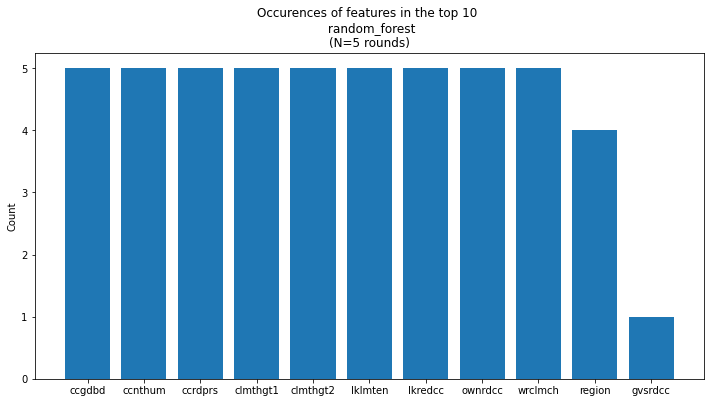

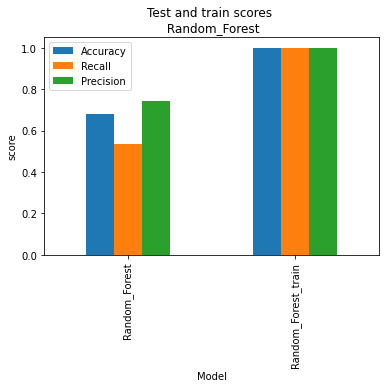

In [106]:
forest_scores_scaled, forest_features_scaled = Random_forest(X_scaled,y, random_states)

In [107]:
forest_scores_scaled

,Model,Accuracy,Recall,Precision,Random_state
0,Random_Forest,0.680333,0.534016,0.743676,"[5, 16, 27, 38, 49]"
1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]"


In [108]:
get_fullname(forest_features_scaled, metadata)

,importance,shorthand,full_text
0,0.021666,ccgdbd,Climate change good or bad impact across world
1,0.017870,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,0.013507,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,0.014568,clmthgt1,How much thought about climate change before today
4,0.034469,clmthgt2,How much thought about climate change before today
5,0.009401,gvsrdcc,"How likely, governments in enough countries take action to reduce climate change"
6,0.010178,lklmten,"How likely, large numbers of people limit energy use"
7,0.010888,lkredcc,"Imagine large numbers of people limit energy use, how likely reduce climate change"
8,0.010294,ownrdcc,"How likely, limiting own energy use reduce climate change"
9,0.009149,region,Region


## Support Vector Classifier
NOTE: takes very long to run <br>
Accuracy is pretty bad<br>
NOT overtrained <br>

In [109]:
# NOTE THIS TAKES OVER AN HOUR PER ROUND TO RUN!
# ACCURACY OF FIRST TWO ROUNDS ~28%. 
# I RECOMMEND TO SKIP THIS CELL.

recall_SVC = []
accuracy_SVC = []
precision_SVC = []
top_features = pd.Series(dtype='float')

recall_SVC_train = []
accuracy_SVC_train = []
precision_SVC_train = []

# random_states = [5,16,27,38,49] 
random_states = [5] 
for i in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
    
    model_SVC = SVC(kernel='rbf', class_weight = "balanced") #train the model
    model_SVC.fit(X_train, y_train) #fit model to training set
    
    y_pred = model_SVC.predict(X_test) #test model on test set
    y_pred_train = model_SVC.predict(X_train) #test model on train set
    
    #accuracu, recall and precision on test set
    accuracy_SVC.append(accuracy_score(y_test, y_pred))
    recall_SVC.append(recall_score(y_test, y_pred, average='macro'))
    precision_SVC.append(precision_score(y_test, y_pred, average='macro'))
    print("Random state:", i, "\n", 
          classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), 
          "\n====================================================\n")
    
    
    accuracy_SVC_train.append(accuracy_score(y_train, y_pred_train))
    recall_SVC_train.append(recall_score(y_train, y_pred_train, average='macro'))
    precision_SVC_train.append(precision_score(y_train, y_pred_train, average='macro'))
    

print(f'MEAN TEST SCORES SUPPORT VECTOR CLASSIFIER: \nAccuracy:, {np.average(accuracy_SVC):.2f},\nRecall:, {np.average(recall_SVC):.2f}, \nPrecision:, {np.average(precision_SVC):.2f}')
print("===============================================")
print(f'MEAN TRAIN SCORES SUPPORT VECTOR CLASSIFIER: \nAccuracy:, {np.average(accuracy_SVC_train):.2f},\nRecall:, {np.average(recall_SVC_train):.2f}, \nPrecision:, {np.average(precision_SVC_train):.2f}')    


Random state: 5 
               precision    recall  f1-score   support

         Def       0.65      0.32      0.43      5028
        Prob       0.39      0.25      0.31      3066
    Prob not       0.05      0.16      0.07       391
     Def not       0.04      0.33      0.08       199
     No data       0.06      0.47      0.10       194

    accuracy                           0.29      8878
   macro avg       0.24      0.31      0.20      8878
weighted avg       0.51      0.29      0.35      8878
 

MEAN TEST SCORES SUPPORT VECTOR CLASSIFIER: 
Accuracy:, 0.29,
Recall:, 0.31, 
Precision:, 0.24
MEAN TRAIN SCORES SUPPORT VECTOR CLASSIFIER: 
Accuracy:, 0.30,
Recall:, 0.35, 
Precision:, 0.25


In [110]:
SVC_scores = pd.DataFrame.from_dict({"Accuracy":[np.average(accuracy_SVC), np.average(accuracy_SVC_train)],
                                     "Recall":[np.average(recall_SVC), np.average(recall_SVC_train)],
                                     "Precision":[np.average(precision_SVC),np.average(precision_SVC_train)],
                                    "Model": ["SVC", "SVC_train"]},
                                   orient="columns")
SVC_scores

,Accuracy,Recall,Precision,Model
0,0.291507,0.306861,0.237672,SVC
1,0.298854,0.348087,0.248404,SVC_train


## XGBoost

X is performing slightly better than X_scaled

In [111]:
#reset random_states to the whole list
random_states = [5,16,27,38,49]

In [112]:
params = {'max_depth': 5, #max depth of a tree
         'objective': 'multi:softmax',  #error evaluation for multiclass training
         'num_class': 6, #number of different outcomes in the target variable (# classes)
         'n_gpus': 0, #Set number of GPUs if available
         "colsample_bytree":0.3,
         "learning_rate":0.1,
         "eval_metric":'mlogloss' #evaluation metric
                  }

### X (unscaled)

Random state: 5 
               precision    recall  f1-score   support

         Def       0.70      0.87      0.78      5028
        Prob       0.59      0.45      0.51      3066
    Prob not       0.83      0.03      0.05       391
     Def not       0.97      1.00      0.99       199
     No data       0.72      0.30      0.42       194

    accuracy                           0.68      8878
   macro avg       0.76      0.53      0.55      8878
weighted avg       0.68      0.68      0.65      8878
 

Random state: 16 
               precision    recall  f1-score   support

         Def       0.68      0.88      0.77      4927
        Prob       0.58      0.42      0.48      3122
    Prob not       0.88      0.02      0.04       382
     Def not       0.98      1.00      0.99       195
     No data       0.76      0.28      0.41       252

    accuracy                           0.66      8878
   macro avg       0.78      0.52      0.54      8878
weighted avg       0.66      0.66     

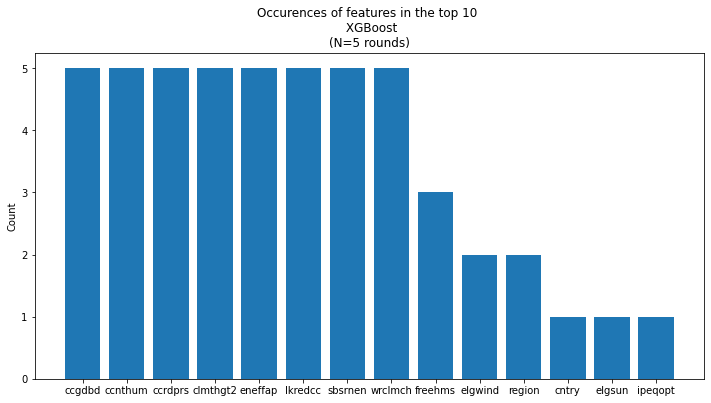

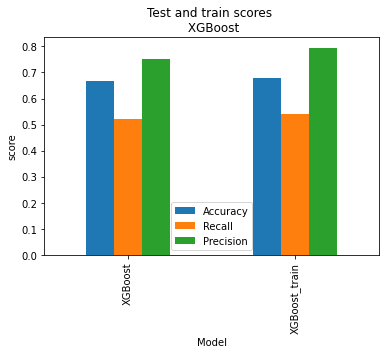

In [113]:
XGBoost_score, XGBoost_features = XG_Boost(X,y,random_states, params)

In [114]:
XGBoost_score

,Model,Accuracy,Recall,Precision,Random_state
0,XGBoost,0.667943,0.521560,0.752674,"[5, 16, 27, 38, 49]"
1,XGBoost_train,0.679997,0.539566,0.795038,"[5, 16, 27, 38, 49]"


In [115]:
get_fullname(XGBoost_features, metadata)

,importance,shorthand,full_text
0,45.2,ccgdbd,Climate change good or bad impact across world
1,43.0,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,27.0,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,46.8,clmthgt2,How much thought about climate change before today
4,20.0,cntry,Country
5,22.0,elgsun,How much electricity in [country] should be generated from solar power
6,23.0,elgwind,How much electricity in [country] should be generated from wind power
7,30.6,eneffap,How likely to buy most energy efficient home appliance
8,21.0,freehms,Gays and lesbians free to live life as they wish
9,22.0,ipeqopt,Important that people are treated equally and have equal opportunities


In [116]:
# score_dict_XGBoost={"Accuracy":np.average(accuracy_XGBoost),"Recall":np.average(recall_XGBoost), "Precision":np.average(precision_XGBoost)}

C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 5 
               precision    recall  f1-score   support

         Def       0.76      0.82      0.79      5028
        Prob       0.59      0.59      0.59      3066
    Prob not       0.67      0.06      0.10       391
     Def not       0.98      0.99      0.99       199
     No data       0.66      0.44      0.53       194

    accuracy                           0.70      8878
   macro avg       0.73      0.58      0.60      8878
weighted avg       0.70      0.70      0.69      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 16 
               precision    recall  f1-score   support

         Def       0.75      0.82      0.78      4927
        Prob       0.60      0.59      0.59      3122
    Prob not       0.64      0.07      0.13       382
     Def not       1.00      0.99      1.00       195
     No data       0.74      0.40      0.52       252

    accuracy                           0.70      8878
   macro avg       0.74      0.58      0.61      8878
weighted avg       0.69      0.70      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 27 
               precision    recall  f1-score   support

         Def       0.74      0.82      0.77      4862
        Prob       0.60      0.59      0.59      3195
    Prob not       0.75      0.07      0.13       406
     Def not       0.98      0.99      0.98       201
     No data       0.68      0.43      0.52       214

    accuracy                           0.69      8878
   macro avg       0.75      0.58      0.60      8878
weighted avg       0.69      0.69      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 38 
               precision    recall  f1-score   support

         Def       0.74      0.83      0.78      4855
        Prob       0.61      0.59      0.60      3191
    Prob not       0.76      0.06      0.12       385
     Def not       1.00      1.00      1.00       204
     No data       0.71      0.35      0.47       243

    accuracy                           0.70      8878
   macro avg       0.76      0.57      0.59      8878
weighted avg       0.70      0.70      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 49 
               precision    recall  f1-score   support

         Def       0.74      0.81      0.78      4923
        Prob       0.59      0.58      0.59      3140
    Prob not       0.51      0.05      0.10       403
     Def not       0.99      0.99      0.99       180
     No data       0.70      0.43      0.53       232

    accuracy                           0.69      8878
   macro avg       0.71      0.57      0.60      8878
weighted avg       0.68      0.69      0.68      8878
 



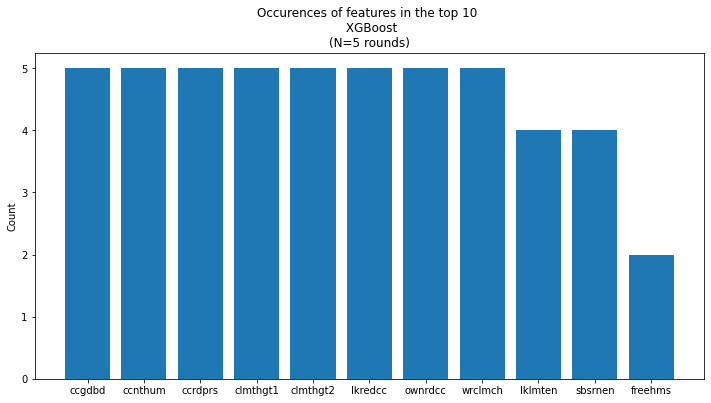

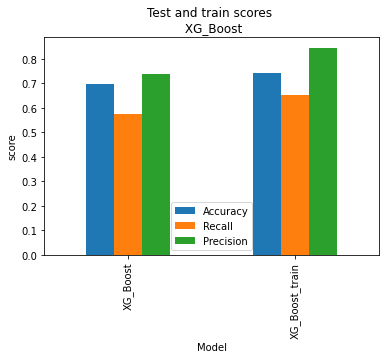

In [117]:
XGBoost_score_version2, XGBoost_features_version2 = XG_Boost_version2(X,y,random_states, params)

In [118]:
XGBoost_score_version2

,Model,Accuracy,Recall,Precision,Random_state
0,XG_Boost,0.696756,0.574740,0.738658,"[5, 16, 27, 38, 49]"
1,XG_Boost_train,0.743507,0.651045,0.845900,"[5, 16, 27, 38, 49]"


In [119]:
get_fullname(XGBoost_features_version2, metadata)

,indices,importance,shorthand,full_text
0,168,0.021650,ccgdbd,Climate change good or bad impact across world
1,165,0.022293,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,166,0.013307,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,163,0.060440,clmthgt1,How much thought about climate change before today
4,164,0.040501,clmthgt2,How much thought about climate change before today
5,88,0.008527,freehms,Gays and lesbians free to live life as they wish
6,170,0.008743,lklmten,"How likely, large numbers of people limit energy use"
7,169,0.010502,lkredcc,"Imagine large numbers of people limit energy use, how likely reduce climate change"
8,172,0.009611,ownrdcc,"How likely, limiting own energy use reduce climate change"
9,174,0.009029,sbsrnen,Favour subsidise renewable energy to reduce climate change


### X_scaled

Random state: 5 
               precision    recall  f1-score   support

         Def       0.70      0.87      0.78      5028
        Prob       0.59      0.45      0.51      3066
    Prob not       0.72      0.03      0.06       391
     Def not       0.96      0.99      0.98       199
     No data       0.68      0.34      0.45       194

    accuracy                           0.68      8878
   macro avg       0.73      0.54      0.56      8878
weighted avg       0.67      0.68      0.65      8878
 

Random state: 16 
               precision    recall  f1-score   support

         Def       0.69      0.87      0.77      4927
        Prob       0.59      0.43      0.50      3122
    Prob not       0.72      0.05      0.09       382
     Def not       0.98      0.99      0.99       195
     No data       0.75      0.33      0.46       252

    accuracy                           0.67      8878
   macro avg       0.75      0.54      0.56      8878
weighted avg       0.66      0.67     

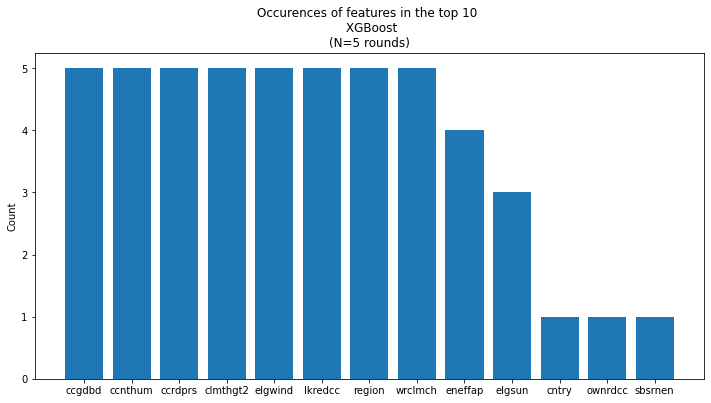

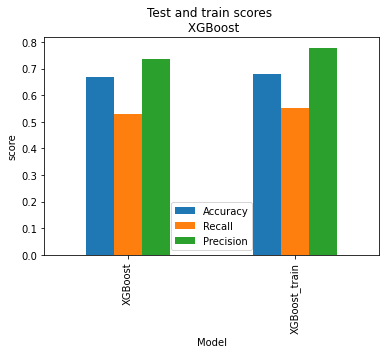

In [120]:
XGBoost_score_scaled, XGBoost_features_scaled = XG_Boost(X_scaled,y,random_states, params)

In [121]:
XGBoost_score_scaled

,Model,Accuracy,Recall,Precision,Random_state
0,XGBoost,0.668056,0.530721,0.736674,"[5, 16, 27, 38, 49]"
1,XGBoost_train,0.680785,0.550161,0.778586,"[5, 16, 27, 38, 49]"


In [122]:
get_fullname(XGBoost_features_scaled, metadata)

,importance,shorthand,full_text
0,26.8,ccgdbd,Climate change good or bad impact across world
1,54.2,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,25.2,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,55.0,clmthgt2,How much thought about climate change before today
4,21.0,cntry,Country
5,21.0,elgsun,How much electricity in [country] should be generated from solar power
6,26.0,elgwind,How much electricity in [country] should be generated from wind power
7,24.5,eneffap,How likely to buy most energy efficient home appliance
8,29.8,lkredcc,"Imagine large numbers of people limit energy use, how likely reduce climate change"
9,17.0,ownrdcc,"How likely, limiting own energy use reduce climate change"


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 5 
               precision    recall  f1-score   support

         Def       0.76      0.82      0.78      5028
        Prob       0.59      0.59      0.59      3066
    Prob not       0.67      0.06      0.11       391
     Def not       0.98      0.98      0.98       199
     No data       0.65      0.43      0.52       194

    accuracy                           0.70      8878
   macro avg       0.73      0.58      0.60      8878
weighted avg       0.70      0.70      0.69      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 16 
               precision    recall  f1-score   support

         Def       0.75      0.82      0.78      4927
        Prob       0.60      0.59      0.59      3122
    Prob not       0.62      0.08      0.14       382
     Def not       1.00      0.99      1.00       195
     No data       0.74      0.41      0.53       252

    accuracy                           0.70      8878
   macro avg       0.74      0.58      0.61      8878
weighted avg       0.69      0.70      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 27 
               precision    recall  f1-score   support

         Def       0.74      0.81      0.77      4862
        Prob       0.60      0.60      0.60      3195
    Prob not       0.73      0.07      0.13       406
     Def not       0.98      0.98      0.98       201
     No data       0.68      0.44      0.54       214

    accuracy                           0.70      8878
   macro avg       0.75      0.58      0.60      8878
weighted avg       0.69      0.70      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 38 
               precision    recall  f1-score   support

         Def       0.74      0.83      0.78      4855
        Prob       0.61      0.59      0.60      3191
    Prob not       0.63      0.07      0.12       385
     Def not       1.00      1.00      1.00       204
     No data       0.68      0.37      0.48       243

    accuracy                           0.70      8878
   macro avg       0.73      0.57      0.60      8878
weighted avg       0.69      0.70      0.68      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 49 
               precision    recall  f1-score   support

         Def       0.74      0.82      0.78      4923
        Prob       0.60      0.59      0.59      3140
    Prob not       0.54      0.06      0.11       403
     Def not       0.99      0.99      0.99       180
     No data       0.72      0.41      0.52       232

    accuracy                           0.70      8878
   macro avg       0.72      0.58      0.60      8878
weighted avg       0.69      0.70      0.68      8878
 



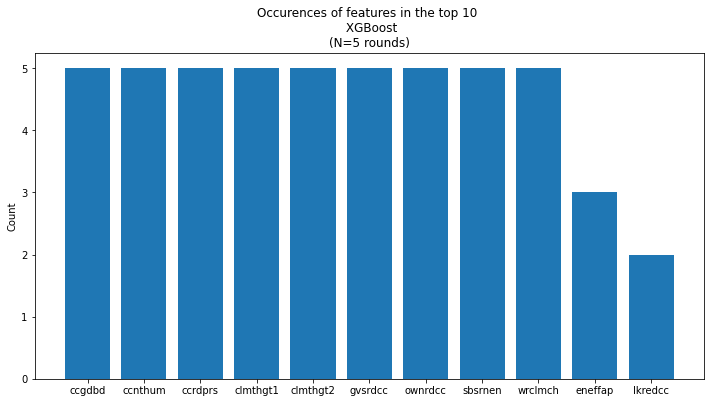

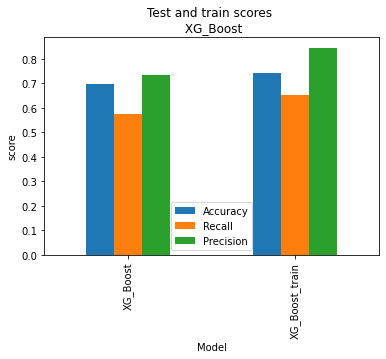

In [123]:
XGBoost_score_version2_scaled, XGBoost_features_version2_scaled = XG_Boost_version2(X_scaled,y,random_states, params)

In [124]:
XGBoost_score_version2_scaled

,Model,Accuracy,Recall,Precision,Random_state
0,XG_Boost,0.697860,0.576295,0.732966,"[5, 16, 27, 38, 49]"
1,XG_Boost_train,0.743575,0.651020,0.845879,"[5, 16, 27, 38, 49]"


In [125]:
get_fullname(XGBoost_features_version2_scaled, metadata)

,indices,importance,shorthand,full_text
0,161,0.019500,ccgdbd,Climate change good or bad impact across world
1,158,0.024639,ccnthum,"Climate change caused by natural processes, human activity, or both"
2,159,0.018671,ccrdprs,To what extent feel personal responsibility to reduce climate change
3,156,0.040413,clmthgt1,How much thought about climate change before today
4,157,0.046463,clmthgt2,How much thought about climate change before today
5,138,0.007961,eneffap,How likely to buy most energy efficient home appliance
6,164,0.012792,gvsrdcc,"How likely, governments in enough countries take action to reduce climate change"
7,162,0.008883,lkredcc,"Imagine large numbers of people limit energy use, how likely reduce climate change"
8,165,0.009978,ownrdcc,"How likely, limiting own energy use reduce climate change"
9,167,0.009295,sbsrnen,Favour subsidise renewable energy to reduce climate change


# Step 4: Rebuilding two models: without climate questions in predictors

In [126]:
#isolate climate questions. 



metadata[["shorthand", "full_text"]] #Are located in row 178 till 209

,shorthand,full_text
0,name,Title of dataset
1,essround,ESS round
2,edition,Edition
3,proddate,Production date
4,idno,Respondent's identification number
5,cntry,Country
6,nwspol,"News about politics and current affairs, watching, reading or listening, in minutes"
7,netusoft,"Internet use, how often"
8,netustm,"Internet use, how much time on typical day, in minutes"
9,ppltrst,Most people can be trusted or you can't be too careful


In [127]:
#get the column names
climate_cols = list(metadata.iloc[178:210, 0]) #rows, columns
print(climate_cols)


['eneffap', 'rdcenr', 'cflsenr', 'elgcoal', 'elgngas', 'elghydr', 'elgnuc', 'elgsun', 'elgwind', 'elgbio', 'wrpwrct', 'wrenexp', 'wrdpimp', 'wrdpfos', 'wrntdis', 'wrinspw', 'wrtcfl', 'wrtratc', 'clmchng', 'clmthgt1', 'clmthgt2', 'ccnthum', 'ccrdprs', 'wrclmch', 'ccgdbd', 'lkredcc', 'lklmten', 'gvsrdcc', 'ownrdcc', 'inctxff', 'sbsrnen', 'banhhap']


In [128]:
X_noclimate = data_adj.drop(climate_cols, axis=1)
y = y

In [129]:
print(len(X_noclimate.columns))
X_noclimate.head()

343


,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,prtvtbit,prtvblt1,prtvblt2,prtvblt3,prtvtfnl,prtvtbno,prtvtdpl,prtvtcpt,prtvtdru,prtvtbse,prtvtesi,contplt,wrkprty,wrkorg,badge,sgnptit,pbldmn,bctprd,pstplonl,clsprty,prtclcat,prtclcbe,prtclfch,prtcldcz,prtclede,prtclfee,prtclees,prtcldfi,prtclefr,prtclbgb,prtclfhu,prtcldie,prtcldil,prtclbis,prtclcit,prtclblt,prtclenl,prtclbno,prtclgpl,prtclept,prtcldru,prtclbse,prtclesi,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,mnrgtjb,freehms,hmsfmlsh,hmsacld,euftf,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,ctzshipc,brncntr,cntbrthc,livecnta,lnghom1,lnghom2,blgetmg,facntr,fbrncntb,mocntr,mbrncntb,gvrfgap,rfgfrpc,rfgbfml,dfincac,smdfslv,uemplwk,slvpens,slvuemp,gvslvol,gvslvue,gvcldcr,sbstrec,sbprvpv,sbeqsoc,sbbsntx,sblazy,sblwcoa,imsclbn,uentrjb,lbenent,bennent,admub,ubpay,ubedu,ubunp,ub50pay,ub50edu,ub50unp,ub20pay,ub20edu,ub20unp,ubsppay,ubspedu,ubspunp,bnlwinc,eduunmp,wrkprbf,basinc,eusclbf,eudcnbf,lkuemp,lknemny,vteurmmb,vteumbgb,vteubcmb,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,agea,yrbrn,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,icpart1,rshpsts,rshpsfi,rshpsgb,lvgptnea,dvrcdeva,icpart2,iccohbt,marsts,marstfi,marstgb,maritalb,chldhm,chldhhe,domicil,edulvlb,eisced,edupl2,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,icpart3,edulvlpb,eiscedp,eduppl2,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,icomdnp,mnactp,icppdwk,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,emprf14,occf14b,edulvlmb,eiscedm,emprm14,occm14b,atncrse,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde
0,0,120.0,4.0,180.0,8.0,8.0,3.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,0.0,2.0,8.0,9.0,10.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,5.0,4.0,4.0,6.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,10.0,10.0,10.0,5.0,6.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,7.0,2.0,-1.0,2.0,-1.0,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,32,2.0,40,2010.0,42,142,2.0,2.0,40,2.0,41,1.0,5.0,1.0,5.0,1.0,2.0,6.0,3.0,10.0,10.0,10.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,4.0,4.0,4.0,-1.0,3.0,4.0,4.0,2.0,55.0,-1.0,55.0,-1.0,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,34.0,1982.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,1.0,2.0,2.0,-1.0,6.0,-1.0,-1.0,6.0,2.0,2.0,1.0,720.0,7.0,-1.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,2.0,2.0,1.0,2015.0,1.0,-1.0,2.0,1.0,2.0,-1.0,5.0,0.0,25.0,1.0,40.0,72.0,2.0,102,2.0,1.0,2.0,1.0,3.0,6.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Random forest
X_noclimate<br><br> 
NOTE: this model never predicts the outcome "definitely not changing" and sometime no "no data" either. This results in a warning. Maybe this can be solved using a balanced train dataset. I will try this in Step 5<br><br>
The accuracy decreases compared to the first Random forest (67 to 60).<br>
More importantly: recall plummets from 53 to 25 and precision drops from 73 to 51.<br>

C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 5 
               precision    recall  f1-score   support

         Def       0.64      0.89      0.74      5028
        Prob       0.53      0.33      0.41      3066
    Prob not       0.00      0.00      0.00       391
     Def not       0.00      0.00      0.00       199
     No data       0.67      0.08      0.15       194

    accuracy                           0.62      8878
   macro avg       0.37      0.26      0.26      8878
weighted avg       0.56      0.62      0.56      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 16 
               precision    recall  f1-score   support

         Def       0.63      0.89      0.73      4927
        Prob       0.53      0.32      0.39      3122
    Prob not       0.00      0.00      0.00       382
     Def not       0.50      0.01      0.01       195
     No data       0.72      0.07      0.13       252

    accuracy                           0.61      8878
   macro avg       0.47      0.26      0.25      8878
weighted avg       0.56      0.61      0.55      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 27 
               precision    recall  f1-score   support

         Def       0.62      0.90      0.73      4862
        Prob       0.54      0.30      0.38      3195
    Prob not       0.00      0.00      0.00       406
     Def not       0.67      0.01      0.02       201
     No data       0.77      0.09      0.17       214

    accuracy                           0.60      8878
   macro avg       0.52      0.26      0.26      8878
weighted avg       0.57      0.60      0.54      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 38 
               precision    recall  f1-score   support

         Def       0.62      0.90      0.73      4855
        Prob       0.55      0.31      0.39      3191
    Prob not       0.00      0.00      0.00       385
     Def not       0.50      0.00      0.01       204
     No data       0.88      0.09      0.16       243

    accuracy                           0.60      8878
   macro avg       0.51      0.26      0.26      8878
weighted avg       0.57      0.60      0.55      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 49 
               precision    recall  f1-score   support

         Def       0.62      0.89      0.73      4923
        Prob       0.54      0.31      0.39      3140
    Prob not       0.00      0.00      0.00       403
     Def not       0.00      0.00      0.00       180
     No data       0.73      0.08      0.15       232

    accuracy                           0.61      8878
   macro avg       0.38      0.26      0.25      8878
weighted avg       0.56      0.61      0.55      8878
 



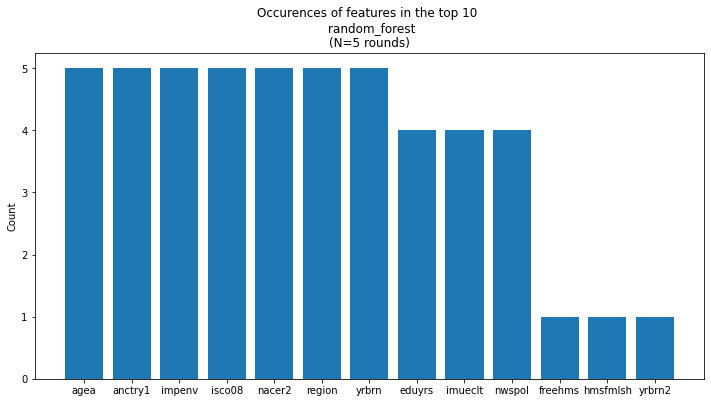

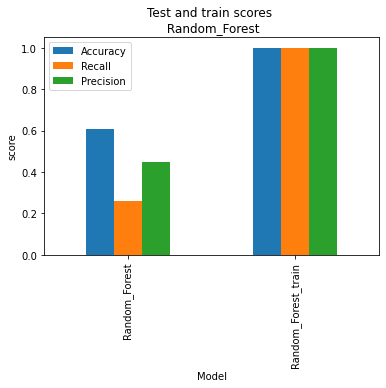

In [130]:
forest_score_noclimate, forest_features_noclimate = Random_forest(X_noclimate, y, random_states)

In [131]:
forest_score_noclimate

,Model,Accuracy,Recall,Precision,Random_state
0,Random_Forest,0.606781,0.258309,0.449824,"[5, 16, 27, 38, 49]"
1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]"


In [132]:
get_fullname(forest_features_noclimate, metadata)

,importance,shorthand,full_text
0,0.010053,agea,"Age of respondent, calculated"
1,0.010914,anctry1,"First ancestry, European Standard Classification of Cultural and Ethnic Groups"
2,0.008472,eduyrs,Years of full-time education completed
3,0.008262,freehms,Gays and lesbians free to live life as they wish
4,0.008338,hmsfmlsh,Ashamed if close family member gay or lesbian
5,0.009962,impenv,Important to care for nature and environment
6,0.008432,imueclt,Country's cultural life undermined or enriched by immigrants
7,0.010068,isco08,"Occupation, ISCO08"
8,0.008971,nacer2,"Industry, NACE rev.2"
9,0.008397,nwspol,"News about politics and current affairs, watching, reading or listening, in minutes"


## XGBoost

X_noclimate

Note: this model never predicts the outcome "definitely not changing" and sometime no "no data" either. This results in a warning. Maybe this can be solved using a balanced train dataset. I will try this in Step 5<br>


C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 5 
               precision    recall  f1-score   support

         Def       0.61      0.92      0.74      5028
        Prob       0.52      0.23      0.32      3066
    Prob not       0.00      0.00      0.00       391
     Def not       0.00      0.00      0.00       199
     No data       0.62      0.08      0.14       194

    accuracy                           0.60      8878
   macro avg       0.35      0.24      0.24      8878
weighted avg       0.54      0.60      0.53      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 16 
               precision    recall  f1-score   support

         Def       0.60      0.92      0.73      4927
        Prob       0.50      0.22      0.30      3122
    Prob not       0.00      0.00      0.00       382
     Def not       0.00      0.00      0.00       195
     No data       0.72      0.09      0.16       252

    accuracy                           0.59      8878
   macro avg       0.37      0.25      0.24      8878
weighted avg       0.53      0.59      0.51      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 27 
               precision    recall  f1-score   support

         Def       0.59      0.93      0.72      4862
        Prob       0.55      0.21      0.30      3195
    Prob not       0.00      0.00      0.00       406
     Def not       0.00      0.00      0.00       201
     No data       0.78      0.08      0.15       214

    accuracy                           0.59      8878
   macro avg       0.38      0.24      0.24      8878
weighted avg       0.54      0.59      0.51      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 38 
               precision    recall  f1-score   support

         Def       0.59      0.93      0.72      4855
        Prob       0.54      0.21      0.30      3191
    Prob not       0.00      0.00      0.00       385
     Def not       0.00      0.00      0.00       204
     No data       0.80      0.08      0.15       243

    accuracy                           0.58      8878
   macro avg       0.39      0.24      0.23      8878
weighted avg       0.54      0.58      0.51      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jetsa\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Random state: 49 
               precision    recall  f1-score   support

         Def       0.60      0.93      0.73      4923
        Prob       0.53      0.21      0.30      3140
    Prob not       0.00      0.00      0.00       403
     Def not       0.00      0.00      0.00       180
     No data       0.80      0.07      0.13       232

    accuracy                           0.59      8878
   macro avg       0.39      0.24      0.23      8878
weighted avg       0.54      0.59      0.51      8878
 



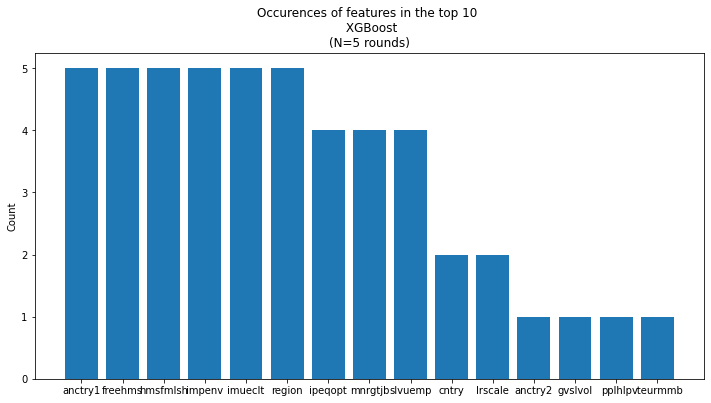

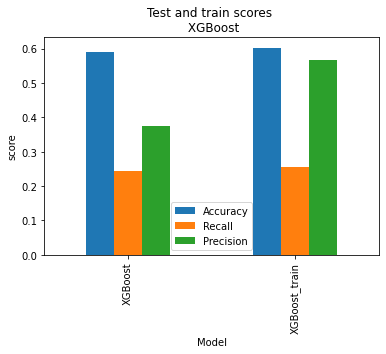

In [133]:
XGBoost_score_noclimate, XGBoost_features_noclimate = XG_Boost(X_noclimate, y, random_states, params)

In [134]:
XGBoost_score_noclimate

,Model,Accuracy,Recall,Precision,Random_state
0,XGBoost,0.589795,0.243781,0.374520,"[5, 16, 27, 38, 49]"
1,XGBoost_train,0.602467,0.256863,0.566073,"[5, 16, 27, 38, 49]"


In [135]:
get_fullname(XGBoost_features_noclimate, metadata)

,importance,shorthand,full_text
0,29.40,anctry1,"First ancestry, European Standard Classification of Cultural and Ethnic Groups"
1,22.00,anctry2,"Second ancestry, European Standard Classification of Cultural and Ethnic Groups"
2,24.00,cntry,Country
3,22.60,freehms,Gays and lesbians free to live life as they wish
4,25.00,gvslvol,"Standard of living for the old, governments' responsibility"
5,25.80,hmsfmlsh,Ashamed if close family member gay or lesbian
6,45.00,impenv,Important to care for nature and environment
7,33.80,imueclt,Country's cultural life undermined or enriched by immigrants
8,22.50,ipeqopt,Important that people are treated equally and have equal opportunities
9,20.50,lrscale,Placement on left right scale


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 5 
               precision    recall  f1-score   support

         Def       0.67      0.83      0.74      5028
        Prob       0.52      0.42      0.47      3066
    Prob not       0.50      0.01      0.01       391
     Def not       0.29      0.01      0.02       199
     No data       0.55      0.21      0.30       194

    accuracy                           0.62      8878
   macro avg       0.50      0.30      0.31      8878
weighted avg       0.60      0.62      0.59      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 16 
               precision    recall  f1-score   support

         Def       0.65      0.83      0.73      4927
        Prob       0.53      0.42      0.47      3122
    Prob not       0.33      0.00      0.01       382
     Def not       0.67      0.02      0.04       195
     No data       0.67      0.19      0.30       252

    accuracy                           0.62      8878
   macro avg       0.57      0.30      0.31      8878
weighted avg       0.60      0.62      0.58      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 27 
               precision    recall  f1-score   support

         Def       0.65      0.85      0.73      4862
        Prob       0.54      0.41      0.46      3195
    Prob not       0.50      0.00      0.00       406
     Def not       0.00      0.00      0.00       201
     No data       0.58      0.20      0.29       214

    accuracy                           0.62      8878
   macro avg       0.45      0.29      0.30      8878
weighted avg       0.58      0.62      0.58      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 38 
               precision    recall  f1-score   support

         Def       0.64      0.85      0.73      4855
        Prob       0.54      0.40      0.46      3191
    Prob not       1.00      0.00      0.01       385
     Def not       0.40      0.01      0.02       204
     No data       0.65      0.19      0.29       243

    accuracy                           0.62      8878
   macro avg       0.65      0.29      0.30      8878
weighted avg       0.62      0.62      0.57      8878
 



C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 49 
               precision    recall  f1-score   support

         Def       0.65      0.85      0.74      4923
        Prob       0.54      0.40      0.46      3140
    Prob not       1.00      0.00      0.00       403
     Def not       1.00      0.01      0.02       180
     No data       0.59      0.21      0.31       232

    accuracy                           0.62      8878
   macro avg       0.76      0.29      0.31      8878
weighted avg       0.63      0.62      0.58      8878
 



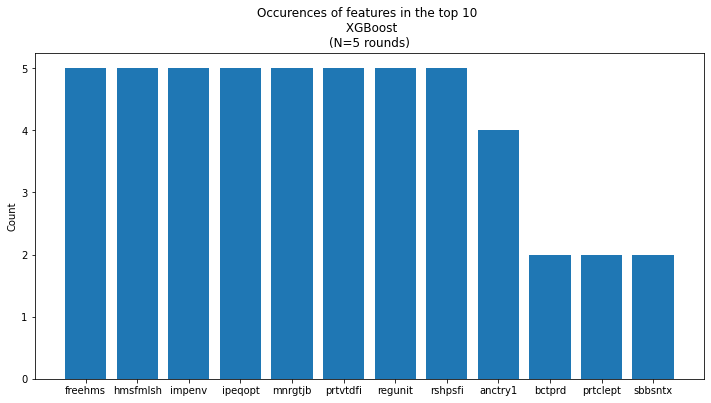

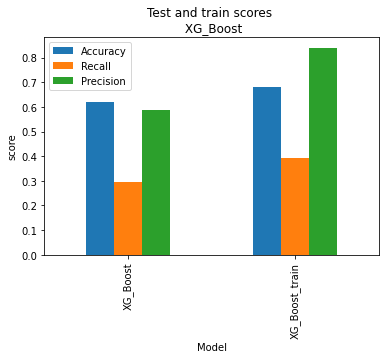

In [136]:
XGBoost_score_version2_noclimate, XGBoost_features_version2_noclimate = XG_Boost_version2(X_noclimate,y,random_states, params)

In [137]:
XGBoost_score_version2_noclimate

,Model,Accuracy,Recall,Precision,Random_state
0,XG_Boost,0.618518,0.293613,0.585619,"[5, 16, 27, 38, 49]"
1,XG_Boost_train,0.681331,0.391461,0.839884,"[5, 16, 27, 38, 49]"


In [138]:
get_fullname(XGBoost_features_version2_noclimate, metadata)

,indices,importance,shorthand,full_text
0,317,0.008858,anctry1,"First ancestry, European Standard Classification of Cultural and Ethnic Groups"
1,52,0.008338,bctprd,Boycotted certain products last 12 months
2,88,0.012969,freehms,Gays and lesbians free to live life as they wish
3,89,0.016497,hmsfmlsh,Ashamed if close family member gay or lesbian
4,337,0.013697,impenv,Important to care for nature and environment
5,321,0.009132,ipeqopt,Important that people are treated equally and have equal opportunities
6,87,0.010575,mnrgtjb,Men should have more right to job than women when jobs are scarce
7,74,0.009641,prtclept,"Which party feel closer to, Portugal"
8,28,0.008950,prtvtdfi,"Party voted for in last national election, Finland"
9,341,0.010223,regunit,Regional unit


# Step 5: Rebuilding with balanced classes

## Random forest
Try to improve performance of random forest without climate questions by balancing the classes (undersampling).

In [141]:
def Random_forest_us(X, y, random_states, undersample_True):
    """
    IN: 
    Dataframe with features (X), dataframe with predictor (y) and a list with random states. 
    The latter also defines the number of runs, so choose wisely.
    undersample_True: True if you want to undersample, False (or anything else) if you don't want to.
    
    OUT: 
    Dataframe with average accuracy, recall and precision scores on both the test and train data.
    Dataframe with the top 10 features of each round
    
    PRINT:
    It will print the classification report per round
    It will print a plot with the most frequently in the top 10 occuring features
    
    """ 
    #lists for performances on test set
    recall_forest = []
    accuracy_forest = []
    precision_forest = []
    
    #lists for performances on train set
    recall_forest_train = []
    accuracy_forest_train = []
    precision_forest_train = []
    
    #top features 
    top_features = pd.Series(dtype='float')

    random_states = random_states

    for i in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
        
        if undersample_True == True:
            # undersample
            # keep random state of undersampling stable through loops, as the train_test_split is already changing
            # otherwise you cant compare between runs as you would change 2 not 1 variables at the time
            undersample = under_sampling.RandomUnderSampler(sampling_strategy='auto', random_state=1)
            X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
            X_train = X_train_under
            y_train = y_train_under
            print(len(X_train), len(y_train))
        else:
            x_train = x_train
            y_train = y_train
    
        
        model_forest = RandomForestClassifier() #train the model
        model_forest.fit(X_train, y_train) #fit model to training set
        
        #test model on test and train set
        y_pred = model_forest.predict(X_test) #test model on test set
        y_pred_train = model_forest.predict(X_train) #test model on train set

        #accuracy, recall and precision on test set
        accuracy_forest.append(accuracy_score(y_test, y_pred))
        recall_forest.append(recall_score(y_test, y_pred, average='macro'))
        precision_forest.append(precision_score(y_test, y_pred, average='macro'))
        print("Random state:", i, "\n", 
              classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), 
              "\n====================================================\n")     
              
        #accuracy, recall and precision on train set
        accuracy_forest_train.append(accuracy_score(y_train, y_pred_train))
        recall_forest_train.append(recall_score(y_train, y_pred_train, average='macro'))
        precision_forest_train.append(precision_score(y_train, y_pred_train, average='macro'))
        
        
        #feature importances 
        feature_names = [f'{X.columns[j]}' for j in range(X.shape[1])]
        importances = model_forest.feature_importances_
        std = np.std([
            tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
        forest_importances = pd.Series(importances, index=feature_names) 
             
        
        #identify highest importances
        top = forest_importances.sort_values(ascending=False)
        top_features = top_features.append(top.head(10))

    
    
    #score_dict_forest = {"Accuracy":np.average(accuracy_forest),"Recall":np.average(recall_forest), "Precision":np.average(precision_forest)}
    score_df_forest = pd.DataFrame({"Model":["Random_Forest","Random_Forest_train"],
                                      "Accuracy":[np.average(accuracy_forest), np.average(accuracy_forest_train)],
                                      "Recall":[np.average(recall_forest), np.average(recall_forest_train)], 
                                      "Precision":[np.average(precision_forest), np.average(precision_forest_train)],  
                                     "Random_state":[random_states, random_states]
                                     })
    
    #turn top features-series into a dataframe
    top_features_df = top_features.to_frame().reset_index()
    top_features_df["model"]= "random_forest"
    top_features_df.columns = ["feature", "importance", "model"]
    
    # plot the top features
    high_low = top_features_df.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    ax.set_title(f'Occurences of features in the top 10 \n {top_features_df["model"][0]}\n(N={len(random_states)} rounds)')
    ax.set_ylabel("Count")
    plt.show();
    
    #plot the scores
    score_df_forest.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {score_df_forest["Model"][0]}')
    plt.ylabel("score")
    plt.show();
   
    
    return score_df_forest, top_features_df


3895 3895
Random state: 5 
               precision    recall  f1-score   support

         Def       0.71      0.49      0.58      5028
        Prob       0.42      0.27      0.33      3066
    Prob not       0.09      0.32      0.14       391
     Def not       0.07      0.35      0.11       199
     No data       0.13      0.66      0.22       194

    accuracy                           0.41      8878
   macro avg       0.28      0.42      0.28      8878
weighted avg       0.56      0.41      0.46      8878
 

3915 3915
Random state: 16 
               precision    recall  f1-score   support

         Def       0.71      0.47      0.56      4927
        Prob       0.43      0.30      0.36      3122
    Prob not       0.09      0.34      0.15       382
     Def not       0.07      0.38      0.12       195
     No data       0.15      0.64      0.24       252

    accuracy                           0.41      8878
   macro avg       0.29      0.42      0.29      8878
weighted avg      

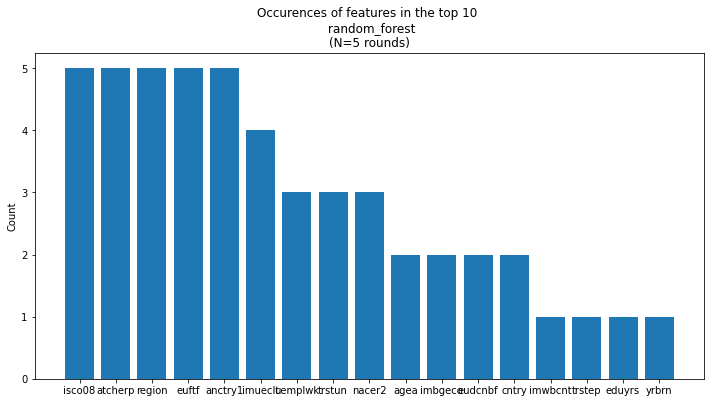

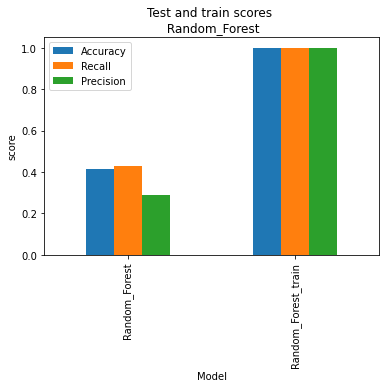

In [142]:
score_df_forest_under, top_features_forest_under = Random_forest_us(X_noclimate, y, random_states, True)

In [143]:
score_df_forest_under

,Model,Accuracy,Recall,Precision,Random_state
0,Random_Forest,0.412345,0.426765,0.290545,"[5, 16, 27, 38, 49]"
1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]"


In [144]:
get_fullname(top_features_forest_under, metadata).sort_values(by="importance")

,importance,shorthand,full_text
4,0.008459,eduyrs,Years of full-time education completed
16,0.008517,yrbrn,Year of birth
11,0.008694,nacer2,"Industry, NACE rev.2"
0,0.008735,agea,"Age of respondent, calculated"
5,0.008852,eudcnbf,More decisions made by EU: level of benefits in [country] become higher or lower
15,0.008855,uemplwk,Of every 100 working age how many unemployed and looking for work
9,0.008889,imwbcnt,Immigrants make country worse or better place to live
7,0.008892,imbgeco,Immigration bad or good for country's economy
10,0.008968,isco08,"Occupation, ISCO08"
2,0.009125,atcherp,How emotionally attached to Europe


## XGBoost

use: undersampling
ADAPTATION OF VERSION 2

In [147]:
def XG_Boost_undersamp(X, y, random_states, params, undersample_True):  
    """
    IN: 
    Dataframe with features (X) 
    Dataframe with predictor (y) 
    List with random states (also defines the number of runs, so choose wisely!)
    Figure name (fig_name) in string format. This name will be used to save the plot.
    params: dictionary with parameters for XQBoost. Eg:
   
         params = {'max_depth': 5, #max depth of a tree
         'objective': 'multi:softmax',  #error evaluation for multiclass training
         'num_class': 6, #number of different outcomes in the target variable (# classes)
         'n_gpus': 0, #Set number of GPUs if available
         "colsample_bytree":0.3,
         "learning_rate":0.1,
         "eval_metric":'mlogloss' #evaluation metric
                  }
    
    OUT: 
    Dataframe with average accuracy, recall and precision scores on both the test and train data.
    Dataframe with the top 10 features of each round
     
    PRINT:
    It will print the classification report per round
    It will print a plot with the most frequently in the top 10 occuring features.
    
    SAVE:
    The plot will be saved in pictures folder
    
   """

    #lists for performances on test set
    recall_XGBoost = []
    accuracy_XGBoost = []
    precision_XGBoost = [] 
    
    #lists for performances on test set
    recall_XGBoost_train = []
    accuracy_XGBoost_train = []
    precision_XGBoost_train = []
    
    top_importances = []
    top_indices = []

    random_states = random_states
    
    for i in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = i) #split data
        
        if undersample_True == True:
            # undersample
            # keep random state of undersampling stable through loops, as the train_test_split is already changing
            # otherwise you cant compare between runs as you would change 2 not 1 variables at the time
            undersample = under_sampling.RandomUnderSampler(sampling_strategy='auto', random_state=1)
            X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
            X_train = X_train_under
            y_train = y_train_under
            print(len(X_train), len(y_train))
        else:
            x_train = x_train
            y_train = y_train
        
        
        model = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', max_depth=5, colsample_bytree=0.3,
         learning_rate = 0.1)
        result = model.fit(X_train, y_train)
        
        y_pred = result.predict(X_test)
        y_pred_train = result.predict(X_train) 
              
        #accuracy, recall and precision on test set
        accuracy_XGBoost.append(accuracy_score(y_test, y_pred))
        recall_XGBoost.append(recall_score(y_test, y_pred, average='macro'))
        precision_XGBoost.append(precision_score(y_test, y_pred, average='macro'))
        print("Random state:", i, "\n", 
              classification_report(y_test, y_pred, target_names=['Def', 'Prob', 'Prob not', "Def not", 'No data']), #changed these around!
              "\n====================================================\n")

        #accuracy, recall and precision on train set
        accuracy_XGBoost_train.append(accuracy_score(y_train, y_pred_train))
        recall_XGBoost_train.append(recall_score(y_train, y_pred_train, average='macro'))
        precision_XGBoost_train.append(precision_score(y_train, y_pred_train, average='macro'))

        #feature importances 
        feature_names = [f'{X.columns[j]}' for j in range(X.shape[1])] #get the names
        importances = model.feature_importances_ #array of importances of all features
        
        importance_df = pd.DataFrame(importances, columns = ['importance']).reset_index() #put array into df
        top_importance_df = importance_df.sort_values(by="importance", ascending=False).head(10) # take top 10 features 
        
        list_top = top_importance_df["importance"].tolist()
        top_importances.extend(list_top)
        
        index_top = top_importance_df["index"].tolist()
        top_indices.extend(index_top)
        
    #put the scores into a dataframe
    score_df_XGBoost = pd.DataFrame({"Model":["XG_Boost","XG_Boost_train"],
                                      "Accuracy":[np.average(accuracy_XGBoost), np.average(accuracy_XGBoost_train)],
                                      "Recall":[np.average(recall_XGBoost), np.average(recall_XGBoost_train)], 
                                      "Precision":[np.average(precision_XGBoost), np.average(precision_XGBoost_train)],  
                                     "Random_state":[random_states, random_states]
                                     })

   
    top_features_XGBoost=pd.DataFrame({"indices":top_indices, "importance":top_importances})
    top_features_XGBoost["model"] = "XGBoost"
    top_features_XGBoost["feature"] = "abc"
    
    for i in range(len(top_features_XGBoost)):
        index_nr = top_features_XGBoost["indices"][i]
        top_features_XGBoost.loc[i, "feature"] = feature_names[index_nr]
        
        
    # plot the top features
    high_low = top_features_XGBoost.groupby("feature").count().sort_values(by="importance",ascending=False).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(x=high_low["feature"], height=high_low["importance"])
    ax.set_title(f'Occurences of features in the top 10 \n {top_features_XGBoost["model"][0]}\n(N={len(random_states)} rounds)')
    ax.set_ylabel("Count")
    plt.show();
    
    #plot the scores
    score_df_XGBoost.plot.bar(x="Model", y=["Accuracy", "Recall", "Precision"])
    plt.title(f'Test and train scores \n {score_df_XGBoost["Model"][0]}')
    plt.ylabel("score")
    plt.show();
    
    return  score_df_XGBoost, top_features_XGBoost

3895 3895


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 5 
               precision    recall  f1-score   support

         Def       0.72      0.48      0.57      5028
        Prob       0.43      0.29      0.35      3066
    Prob not       0.09      0.35      0.14       391
     Def not       0.07      0.37      0.12       199
     No data       0.14      0.69      0.23       194

    accuracy                           0.41      8878
   macro avg       0.29      0.44      0.28      8878
weighted avg       0.57      0.41      0.46      8878
 

3915 3915


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 16 
               precision    recall  f1-score   support

         Def       0.72      0.49      0.59      4927
        Prob       0.46      0.29      0.36      3122
    Prob not       0.09      0.32      0.14       382
     Def not       0.07      0.38      0.11       195
     No data       0.16      0.62      0.25       252

    accuracy                           0.42      8878
   macro avg       0.30      0.42      0.29      8878
weighted avg       0.57      0.42      0.47      8878
 

3885 3885


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 27 
               precision    recall  f1-score   support

         Def       0.73      0.52      0.61      4862
        Prob       0.47      0.29      0.36      3195
    Prob not       0.09      0.34      0.15       406
     Def not       0.09      0.44      0.14       201
     No data       0.15      0.65      0.25       214

    accuracy                           0.43      8878
   macro avg       0.31      0.45      0.30      8878
weighted avg       0.58      0.43      0.48      8878
 

3870 3870


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 38 
               precision    recall  f1-score   support

         Def       0.71      0.51      0.59      4855
        Prob       0.45      0.28      0.35      3191
    Prob not       0.09      0.34      0.14       385
     Def not       0.08      0.38      0.13       204
     No data       0.16      0.63      0.25       243

    accuracy                           0.42      8878
   macro avg       0.30      0.43      0.29      8878
weighted avg       0.56      0.42      0.46      8878
 

3990 3990


C:\Users\jetsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random state: 49 
               precision    recall  f1-score   support

         Def       0.74      0.48      0.58      4923
        Prob       0.47      0.36      0.41      3140
    Prob not       0.10      0.30      0.15       403
     Def not       0.07      0.42      0.13       180
     No data       0.14      0.64      0.24       232

    accuracy                           0.43      8878
   macro avg       0.31      0.44      0.30      8878
weighted avg       0.59      0.43      0.48      8878
 



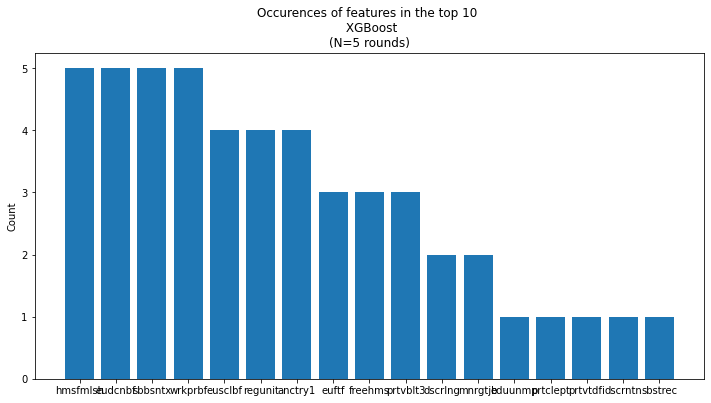

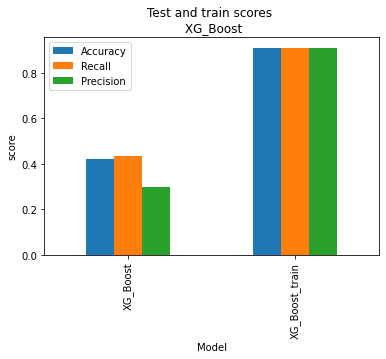

In [148]:
score_df_XGBoost_undersample, top_features_XGBoost_undersample = XG_Boost_undersamp(X_noclimate, y, random_states, params, True)

In [149]:
score_df_XGBoost_undersample

,Model,Accuracy,Recall,Precision,Random_state
0,XG_Boost,0.422212,0.434500,0.299768,"[5, 16, 27, 38, 49]"
1,XG_Boost_train,0.908876,0.908876,0.909842,"[5, 16, 27, 38, 49]"


In [150]:
get_fullname(top_features_XGBoost_undersample, metadata)

,indices,importance,shorthand,full_text
0,317,0.008399,anctry1,"First ancestry, European Standard Classification of Cultural and Ethnic Groups"
1,119,0.007321,dscrlng,Discrimination of respondent's group: language
2,117,0.007273,dscrntn,Discrimination of respondent's group: nationality
3,177,0.007227,eduunmp,Spend more on education for unemployed at cost of unemployment benefit
4,181,0.010654,eudcnbf,More decisions made by EU: level of benefits in [country] become higher or lower
5,91,0.007260,euftf,European Union: European unification go further or gone too far
6,180,0.007908,eusclbf,Against or In favour of European Union-wide social benefit scheme
7,88,0.007543,freehms,Gays and lesbians free to live life as they wish
8,89,0.008927,hmsfmlsh,Ashamed if close family member gay or lesbian
9,87,0.007209,mnrgtjb,Men should have more right to job than women when jobs are scarce


# Plots for presentation

## plot models from step 4

In [151]:
# comp_scores = "tree_score", "SVC_score ""forest_score", "XGBoost_score"
comp_scores = pd.concat([tree_scores, forest_scores, SVC_scores, XGBoost_score], join="outer")
comp_scores

,Accuracy,Recall,Precision,Model,Random_state
0,0.581505,0.520757,0.520764,Tree,NaN
1,1.000000,1.000000,1.000000,tree_train,NaN
0,0.678779,0.530563,0.752570,Random_Forest,"[5, 16, 27, 38, 49]"
1,1.000000,1.000000,1.000000,Random_Forest_train,"[5, 16, 27, 38, 49]"
0,0.291507,0.306861,0.237672,SVC,NaN
1,0.298854,0.348087,0.248404,SVC_train,NaN
0,0.667943,0.521560,0.752674,XGBoost,"[5, 16, 27, 38, 49]"
1,0.679997,0.539566,0.795038,XGBoost_train,"[5, 16, 27, 38, 49]"


In [152]:
comp_scores = comp_scores.reset_index()

In [153]:
comp_scores_test=comp_scores.drop([1,3,5,7])
comp_scores_test

,index,Accuracy,Recall,Precision,Model,Random_state
0,0,0.581505,0.520757,0.520764,Tree,NaN
2,0,0.678779,0.530563,0.752570,Random_Forest,"[5, 16, 27, 38, 49]"
4,0,0.291507,0.306861,0.237672,SVC,NaN
6,0,0.667943,0.521560,0.752674,XGBoost,"[5, 16, 27, 38, 49]"


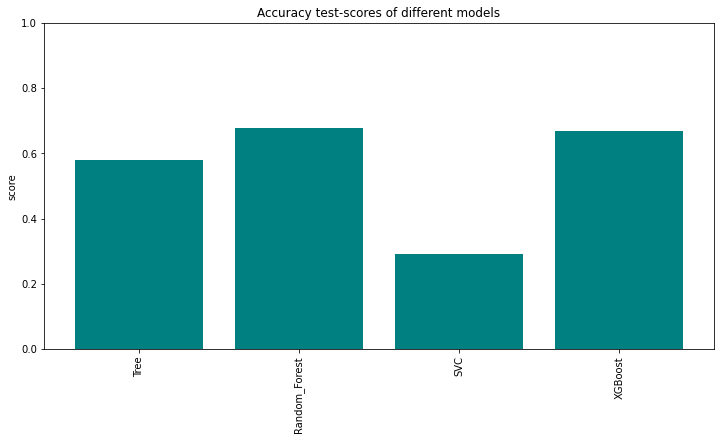

In [154]:
fig, ax = plt.subplots(figsize=(12,6))

plt.bar(x=comp_scores_test["Model"], height=comp_scores_test["Accuracy"], color="teal")
ax.set_title("Accuracy test-scores of different models")
ax.set_ylabel("score")
ax.set_ylim(0,1)
plt.xticks(rotation=90)
fig.savefig('./pictures/Accuracy_4models.png', dpi=200) #save plot in pictures folder
plt.show();

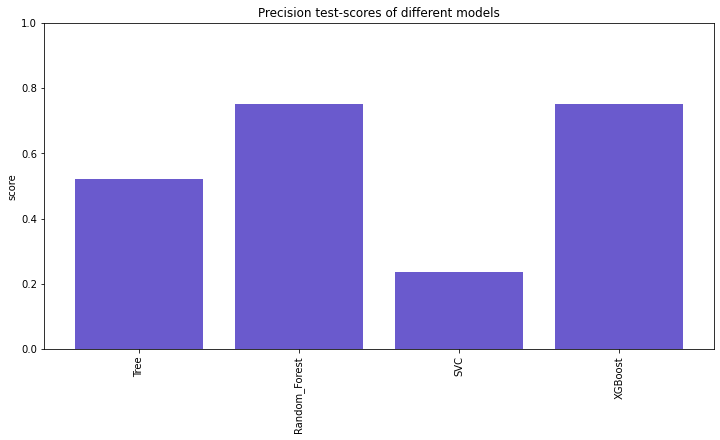

In [155]:
fig, ax = plt.subplots(figsize=(12,6))

plt.bar(x=comp_scores_test["Model"], height=comp_scores_test["Precision"], color="slateblue")
ax.set_title("Precision test-scores of different models")
ax.set_ylabel("score")
ax.set_ylim(0,1)
plt.xticks(rotation=90)
fig.savefig('./pictures/Precision_4models.png', dpi=200) #save plot in pictures folder
plt.show();

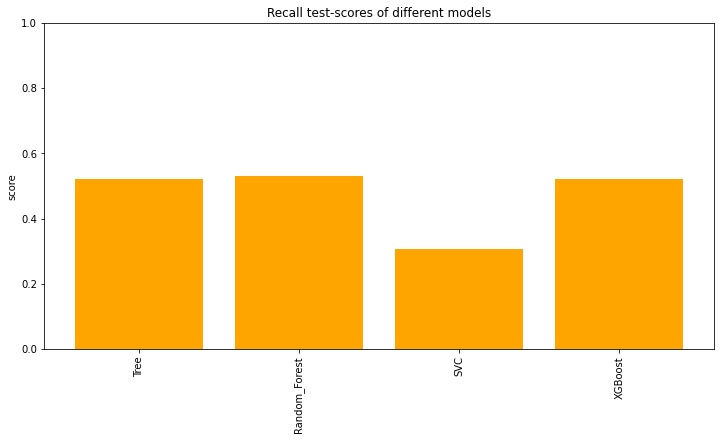

In [156]:
fig, ax = plt.subplots(figsize=(12,6))

plt.bar(x=comp_scores_test["Model"], height=comp_scores_test["Recall"], color="orange")
ax.set_title("Recall test-scores of different models")
ax.set_ylabel("score")
ax.set_ylim(0,1)
plt.xticks(rotation=90)
fig.savefig('./pictures/Recall_4models.png', dpi=200) #save plot in pictures folder
plt.show();

## Plot model test-scores from step 5 and 6

<b>RANDOM FOREST<b/>

In [157]:
forest_scores["version"] = "start"
forest_scores

,Model,Accuracy,Recall,Precision,Random_state,version
0,Random_Forest,0.678779,0.530563,0.75257,"[5, 16, 27, 38, 49]",start
1,Random_Forest_train,1.000000,1.000000,1.00000,"[5, 16, 27, 38, 49]",start


In [158]:
forest_score_noclimate["version"] = "no_climate"
forest_score_noclimate

,Model,Accuracy,Recall,Precision,Random_state,version
0,Random_Forest,0.606781,0.258309,0.449824,"[5, 16, 27, 38, 49]",no_climate
1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]",no_climate


In [159]:
score_df_forest_under["version"] = "undersample"
score_df_forest_under

,Model,Accuracy,Recall,Precision,Random_state,version
0,Random_Forest,0.412345,0.426765,0.290545,"[5, 16, 27, 38, 49]",undersample
1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]",undersample


In [160]:
comp_forest = pd.concat([forest_scores, forest_score_noclimate, score_df_forest_under], join="outer").reset_index()
comp_forest

,index,Model,Accuracy,Recall,Precision,Random_state,version
0,0,Random_Forest,0.678779,0.530563,0.752570,"[5, 16, 27, 38, 49]",start
1,1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]",start
2,0,Random_Forest,0.606781,0.258309,0.449824,"[5, 16, 27, 38, 49]",no_climate
3,1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]",no_climate
4,0,Random_Forest,0.412345,0.426765,0.290545,"[5, 16, 27, 38, 49]",undersample
5,1,Random_Forest_train,1.000000,1.000000,1.000000,"[5, 16, 27, 38, 49]",undersample


In [163]:
comp_forest_test = comp_forest.drop([1,3,5])

<ipython-input-164-a4cb0547540f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(labels=comp_forest_test["version"],rotation=90)


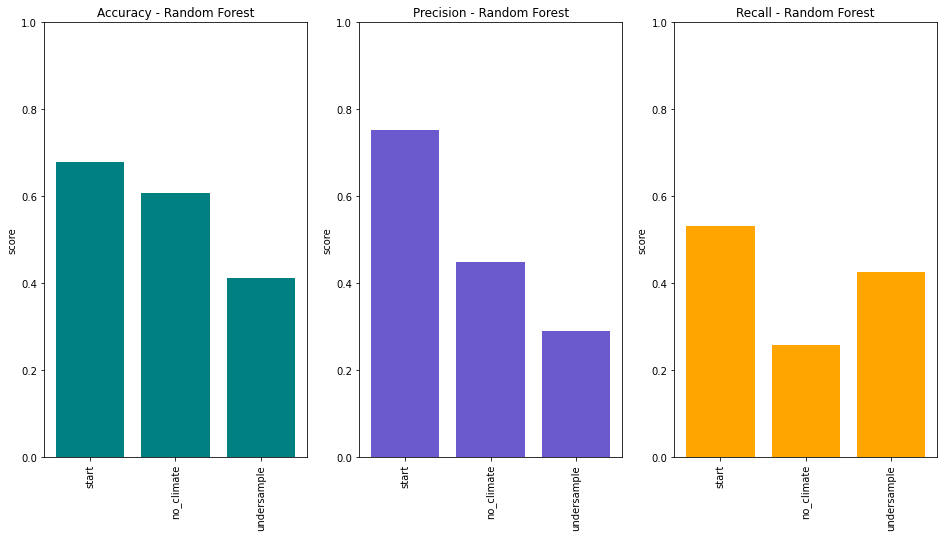

In [164]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
#plt.tight_layout()

color = ["teal", "slateblue", "orange"]
col_name=["Accuracy", "Precision", "Recall"]

for i in range(len(color)):
    ax[i].bar(comp_forest_test["version"], comp_forest_test[col_name[i]], color=color[i])
    ax[i].set_title(f'{col_name[i]} - Random Forest')
    ax[i].set_ylabel("score")
    ax[i].set_ylim(0,1)
    ax[i].set_xticklabels(labels=comp_forest_test["version"],rotation=90)

fig.savefig('./pictures/Forest_triple.png', dpi=200, bbox_inches='tight') #save plot in pictures folder
plt.show();

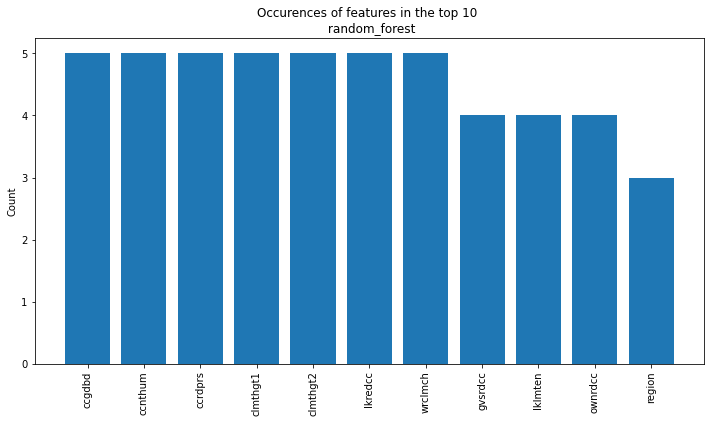

In [165]:
plot_top_features(forest_features, "feat_forest_start")

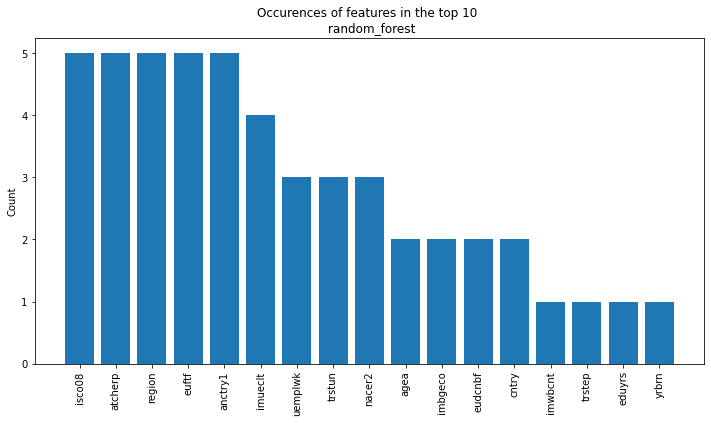

In [166]:
plot_top_features(top_features_forest_under, "feat_forest_under")

<b>XGBOOST </b>

In [167]:
XGBoost_score["version"] = "start"
XGBoost_score

,Model,Accuracy,Recall,Precision,Random_state,version
0,XGBoost,0.667943,0.521560,0.752674,"[5, 16, 27, 38, 49]",start
1,XGBoost_train,0.679997,0.539566,0.795038,"[5, 16, 27, 38, 49]",start


In [168]:
XGBoost_score_noclimate["version"] = "no_climate"
XGBoost_score_noclimate

,Model,Accuracy,Recall,Precision,Random_state,version
0,XGBoost,0.589795,0.243781,0.374520,"[5, 16, 27, 38, 49]",no_climate
1,XGBoost_train,0.602467,0.256863,0.566073,"[5, 16, 27, 38, 49]",no_climate


In [169]:
score_df_XGBoost_undersample["version"] = "undersample"
score_df_XGBoost_undersample

,Model,Accuracy,Recall,Precision,Random_state,version
0,XG_Boost,0.422212,0.434500,0.299768,"[5, 16, 27, 38, 49]",undersample
1,XG_Boost_train,0.908876,0.908876,0.909842,"[5, 16, 27, 38, 49]",undersample


In [170]:
comp_XGB = pd.concat([XGBoost_score, XGBoost_score_noclimate, score_df_XGBoost_undersample], join="outer").reset_index()
comp_XGB

,index,Model,Accuracy,Recall,Precision,Random_state,version
0,0,XGBoost,0.667943,0.521560,0.752674,"[5, 16, 27, 38, 49]",start
1,1,XGBoost_train,0.679997,0.539566,0.795038,"[5, 16, 27, 38, 49]",start
2,0,XGBoost,0.589795,0.243781,0.374520,"[5, 16, 27, 38, 49]",no_climate
3,1,XGBoost_train,0.602467,0.256863,0.566073,"[5, 16, 27, 38, 49]",no_climate
4,0,XG_Boost,0.422212,0.434500,0.299768,"[5, 16, 27, 38, 49]",undersample
5,1,XG_Boost_train,0.908876,0.908876,0.909842,"[5, 16, 27, 38, 49]",undersample


In [171]:
comp_XGB_test = comp_XGB.drop([1,3,5])

<ipython-input-172-bb9ce759db8d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(labels=comp_XGB_test["version"],rotation=90)


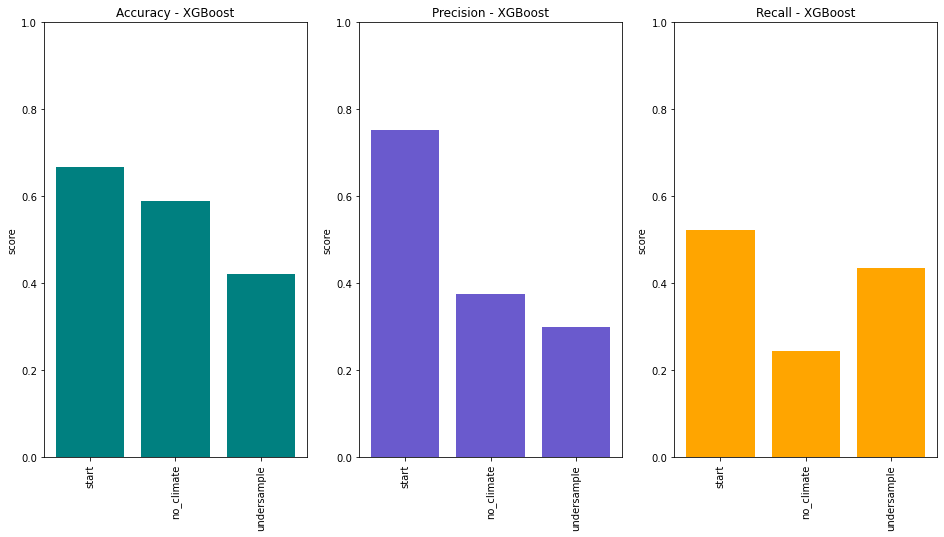

In [172]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
#plt.tight_layout()

color = ["teal", "slateblue", "orange"]
col_name=["Accuracy", "Precision", "Recall"]

for i in range(len(color)):
    ax[i].bar(comp_XGB_test["version"], comp_XGB_test[col_name[i]], color=color[i])
    ax[i].set_title(f'{col_name[i]} - XGBoost')
    ax[i].set_ylabel("score")
    ax[i].set_ylim(0,1)
    ax[i].set_xticklabels(labels=comp_XGB_test["version"],rotation=90)

fig.savefig('./pictures/XGBoost_triple_test.png', dpi=200, bbox_inches='tight') #save plot in pictures folder
plt.show();

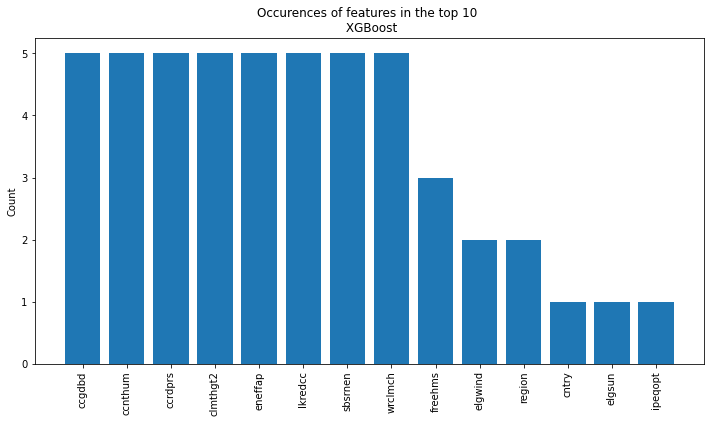

In [173]:
plot_top_features(XGBoost_features, "feat_XGB_start")

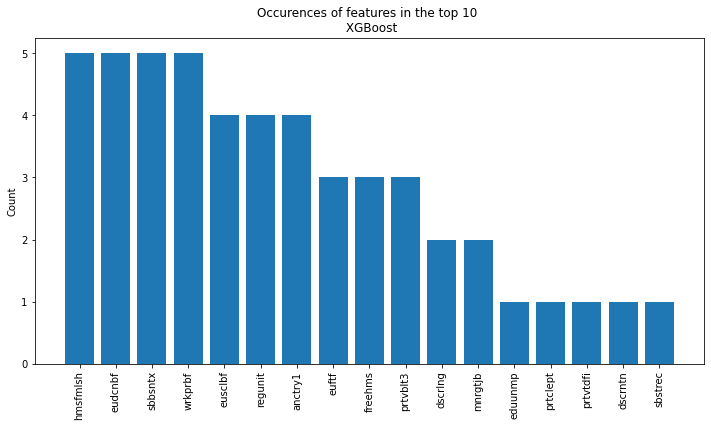

In [174]:
plot_top_features(top_features_XGBoost_undersample, "feat_XGB_under")